# Pré-processamento - Parte 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
plt.rcParams["figure.figsize"] = (21,9)
plt.rcParams['font.size'] = 20

In [10]:
# Função para plotar um gráfico
def plotar_grafico(coluna, titulo):
    print(df[coluna].value_counts(), df[coluna].unique())
    df.groupby([coluna, 'Q002']).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    ).unstack().plot(kind='bar',stacked=True)
    plt.rcParams["figure.figsize"] = (30,10)
    plt.title(titulo)
    plt.xlabel("")
    plt.show()

In [16]:
#Variáveis e suas explicações
variaveis = [
    ('V0001', 'Hipertensão por estado brasileiro'),
    ('C008', 'Hipertensão por idade'),
    ('C009', 'Hipertensão por Cor ou raça'),
    ('C010', 'Hipertensão por vive com cônjuge ou companheiro (a)?'),
    ('E001', 'Hipertensão por trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em dinheiro?'),
    ('E003', 'Hipertensão por fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?'),
    ('J001', 'Hipertensão por De um modo geral, como é o estado de saúde de?'),
    ('M016', 'Hipertensão por Nos últimos 12 meses, com que frequência o(a) sr(a) participou de atividades esportivas ou artísticas em grupo?'),
    ('N010', 'Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas no sono, como dificuldade para adormecer, acordar frequentemente à noite ou dormir mais do que de costume?'),
    ('N011', 'Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas por não se sentir descansado(a) e disposto(a) durante o dia, sentindo-se cansado(a), sem ter energia?'),
    ('N012', 'Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve pouco interesse ou não sentiu prazer em fazer as coisas?'),
    ('N013', 'Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas para se concentrar nas suas atividades habituais?'),
    ('N014', 'Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas na alimentação, como ter falta de apetite ou comer muito mais do que costume?'),
    ('N015', 'Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve lentidão para se movimentar ou falar, ou ao contrário, ficou muito agitado(a) ou inquieto(a)?'),
    ('N016', 'Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) se sentiu deprimido(a), “pra baixo” ou sem perspectiva?'),
    ('N017', 'Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) se sentiu mal consigo mesmo, se achando um fracasso ou achando que decepcionou sua família?'),
    ('P006', 'Hipertensão por Em quantos dias da semana o(a) sr(a) costuma comer feijão?'),
    ('P007', 'Hipertensão por Em quantos dias da semana, o(a) sr(a) costuma comer salada de alface e tomate ou salada de qualquer outra verdura ou legume cru?'),
    ('P009', 'Hipertensão por Em quantos dias da semana, o(a) sr(a) costuma comer verdura ou legume cozido, como couve, cenoura, chuchu, berinjela, abobrinha?'),
    ('P011', 'Hipertensão por Em quantos dias da semana o(a) sr(a) costuma comer carne vermelha (boi, porco, cabrito)?'),
    ('P013', 'Hipertensão por Em quantos dias da semana o(a) sr(a) costuma comer frango/galinha?'),
    ('P015', 'Hipertensão por Em quantos dias da semana o(a) sr(a) costuma comer peixe?'),
    ('P016', 'Hipertensão por Em quantos dias da semana o(a) sr(a) costuma tomar suco de frutas natural?'),
    ('P018', 'Hipertensão por Em quantos dias da semana o(a) sr(a) costuma comer frutas?'),
    ('P020', 'Hipertensão por Em quantos dias da semana o(a) sr(a) costuma tomar refrigerante ou suco artificial?'),
    ('P023', 'Hipertensão por Em quantos dias da semana o(a) sr(a) costuma tomar leite?'),
    ('P025', 'Hipertensão por Em quantos dias da semana o(a) sr(a) come alimentos doces, tais como pedaços de bolo ou torta, doces, chocolates, balas, biscoitos ou bolachas doces?'),
    ('P026', 'Hipertensão por Em quantos dias da semana o(a) sr(a) substitui a refeição do almoço ou jantar por sanduiches, salgados ou pizzas?'),
    ('P02601', 'Hipertensão por Considerando a comida preparada na hora e os alimentos industrializados, o(a) sr(a) acha que seu consumo de sal é:'),
    ('P034', 'Hipertensão por Nos últimos três meses, o(a) sr(a) praticou algum tipo de exercício físico ou esporte?'),
    ('P042', 'Hipertensão por Nas suas atividades habituais (tais como ir a algum curso, escola ou clube ou levar alguém a algum curso, escola ou clube), quantos dias por semana o(a) sr(a) faz alguma atividade que envolva deslocamento a pé ou bicicleta?'),
    ('P044', 'Hipertensão por Nas suas atividades domésticas, o(a) sr(a) faz faxina pesada, carrega peso ou faz outra atividade pesada que requer esforço físico intenso?'),
    ('P045', 'Hipertensão por Em média, quantas horas por dia o(a) sr(a) costuma ficar assistindo televisão?'),
    ('P050', 'Hipertensão por Atualmente, o(a) sr(a) fuma algum produto do tabaco?'),
    ('P068', 'Hipertensão por Com que frequência alguém fuma dentro do seu domicílio?'),
    ('Q002', 'Hipertensão'),
    ('X001', 'Hipertensão por Quando foi a última vez que o(a) sr(a) consultou um médico?'),
    ('regiao', 'Hipertensão por região do Brasil')
]

In [2]:
df = pd.read_csv('hipertensao_18a25.csv', sep=';')
df.head()

,V0001,C008,C009,C010,E001,E003,J001,M016,N010,N011,...,P026,P02601,P034,P042,P044,P045,P050,P068,Q002,X001
0,11,23,4,1.0,2.0,2.0,3,6.0,1.0,2.0,...,2,4.0,2.0,0,2.0,5.0,3.0,5.0,1.0,2.0
1,11,24,4,1.0,2.0,2.0,3,6.0,1.0,1.0,...,7,4.0,2.0,5,2.0,5.0,3.0,4.0,1.0,3.0
2,11,19,4,2.0,2.0,2.0,3,6.0,1.0,1.0,...,0,4.0,2.0,7,2.0,5.0,3.0,5.0,1.0,2.0
3,11,21,4,1.0,1.0,2.0,2,6.0,1.0,1.0,...,2,3.0,2.0,0,2.0,2.0,3.0,5.0,1.0,5.0
4,11,24,4,1.0,2.0,2.0,3,6.0,1.0,1.0,...,0,3.0,2.0,3,2.0,5.0,3.0,5.0,1.0,5.0


In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    2412 non-null   float64
 6   J001    2412 non-null   int64  
 7   M016    2412 non-null   float64
 8   N010    2412 non-null   float64
 9   N011    2412 non-null   float64
 10  N012    2412 non-null   float64
 11  N013    2412 non-null   float64
 12  N014    2412 non-null   float64
 13  N015    2412 non-null   float64
 14  N016    2412 non-null   float64
 15  N017    2412 non-null   float64
 16  P006    2412 non-null   int64  
 17  P007    2412 non-null   int64  
 18  P009    2412 non-null   int64  
 19  P011    2412 non-null   int64  
 20  P013    2412 non-null   int64  
 21  P015    2412 non-null   int64  
 22  

In [4]:
# V001 -> estados -> passando para regiões do brasil

testeRegioes = df

regiao = testeRegioes['V0001'].copy()

for i in range(testeRegioes.shape[0]):
    regiao.iloc[i] = regiao.iloc[i] // 10

testeRegioes['regiao'] = regiao

testeRegioes['regiao'].value_counts()

2    731
1    625
3    487
5    324
4    245
Name: regiao, dtype: int64

In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   2412 non-null   int64  
 1   C008    2412 non-null   int64  
 2   C009    2412 non-null   int64  
 3   C010    2412 non-null   float64
 4   E001    2412 non-null   float64
 5   E003    2412 non-null   float64
 6   J001    2412 non-null   int64  
 7   M016    2412 non-null   float64
 8   N010    2412 non-null   float64
 9   N011    2412 non-null   float64
 10  N012    2412 non-null   float64
 11  N013    2412 non-null   float64
 12  N014    2412 non-null   float64
 13  N015    2412 non-null   float64
 14  N016    2412 non-null   float64
 15  N017    2412 non-null   float64
 16  P006    2412 non-null   int64  
 17  P007    2412 non-null   int64  
 18  P009    2412 non-null   int64  
 19  P011    2412 non-null   int64  
 20  P013    2412 non-null   int64  
 21  P015    2412 non-null   int64  
 22  

35    189
13    137
31    127
26    110
33    105
52    104
41    102
23    101
29     94
43     93
11     93
12     92
50     90
28     87
15     86
53     81
14     79
16     72
21     71
27     71
25     67
22     67
17     66
32     66
24     63
42     50
51     49
Name: V0001, dtype: int64 [11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 29 31 32 33 35 41 42 43 50
 51 52 53]


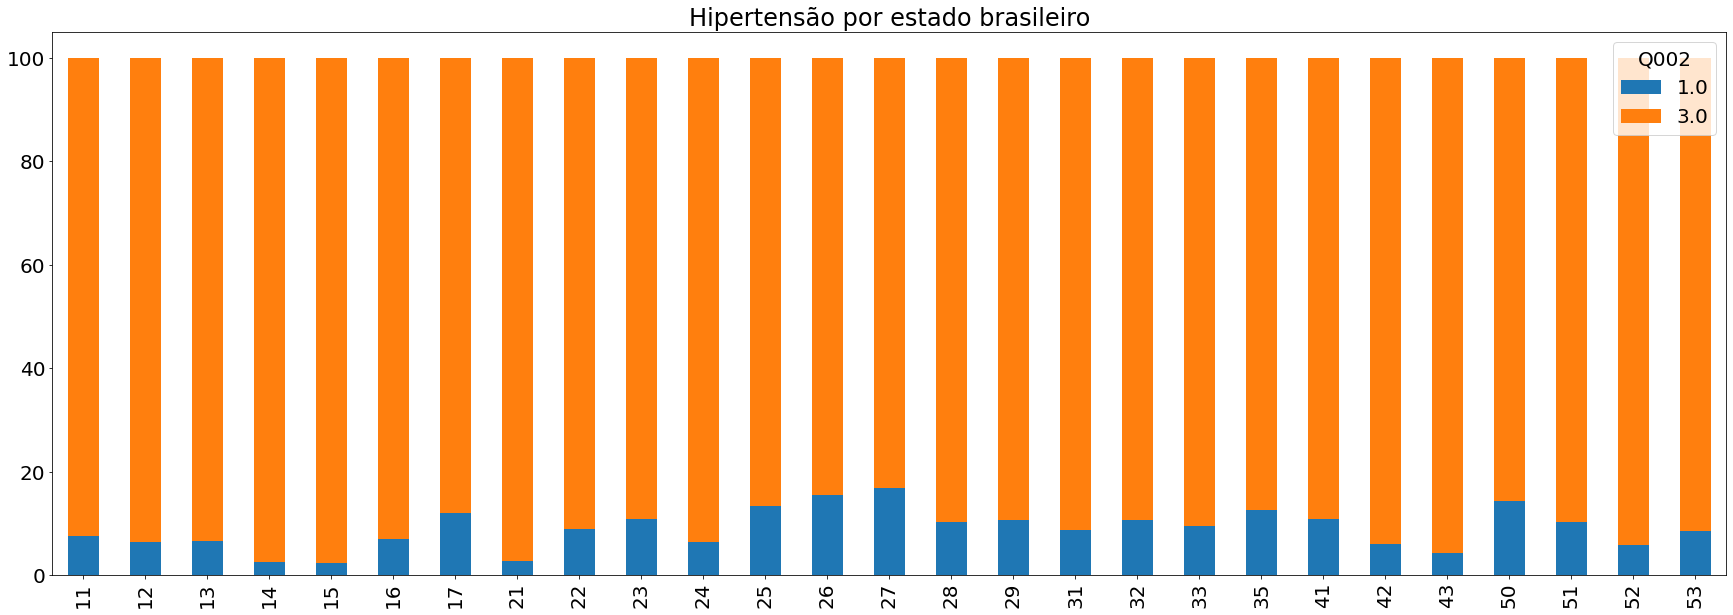

25    350
24    335
22    303
23    302
19    293
18    283
21    274
20    272
Name: C008, dtype: int64 [23 24 19 21 18 25 22 20]


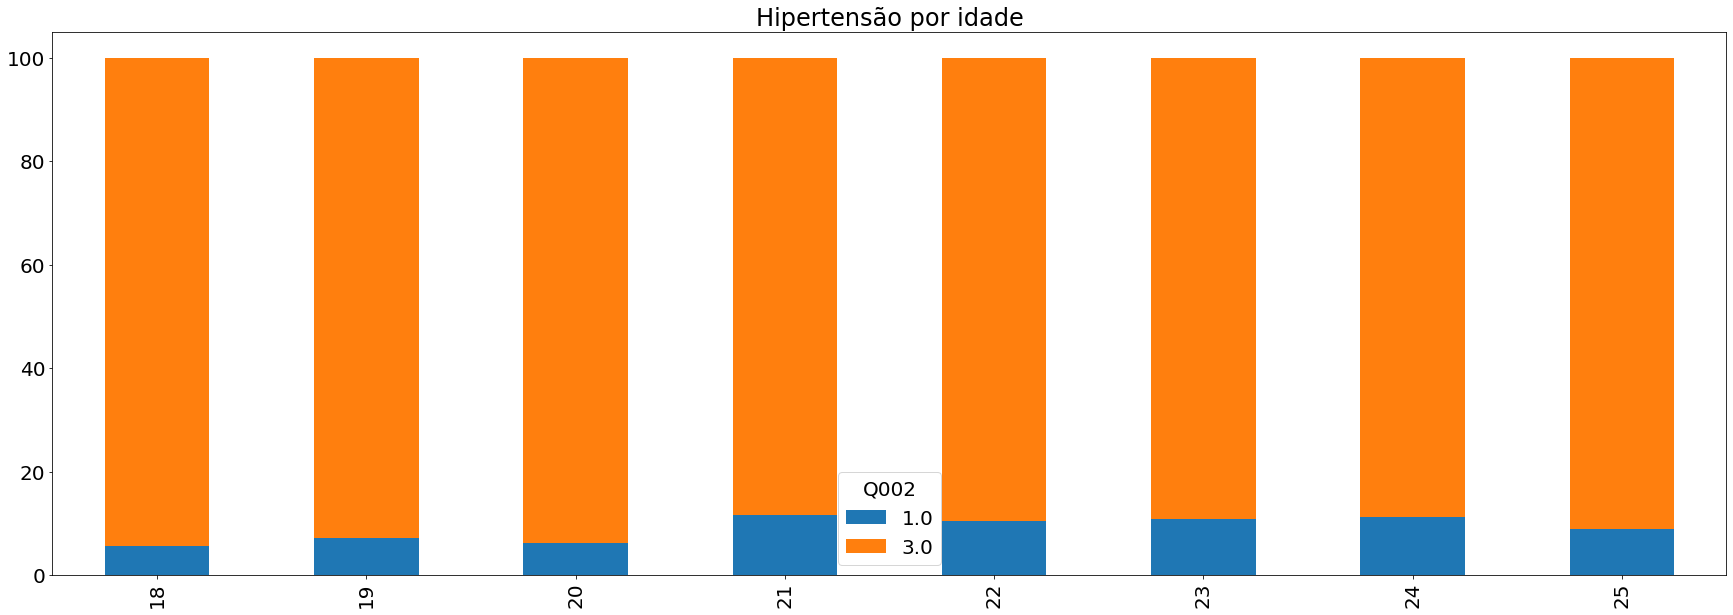

4    1318
1     828
2     227
3      26
5      13
Name: C009, dtype: int64 [4 1 3 2 5]


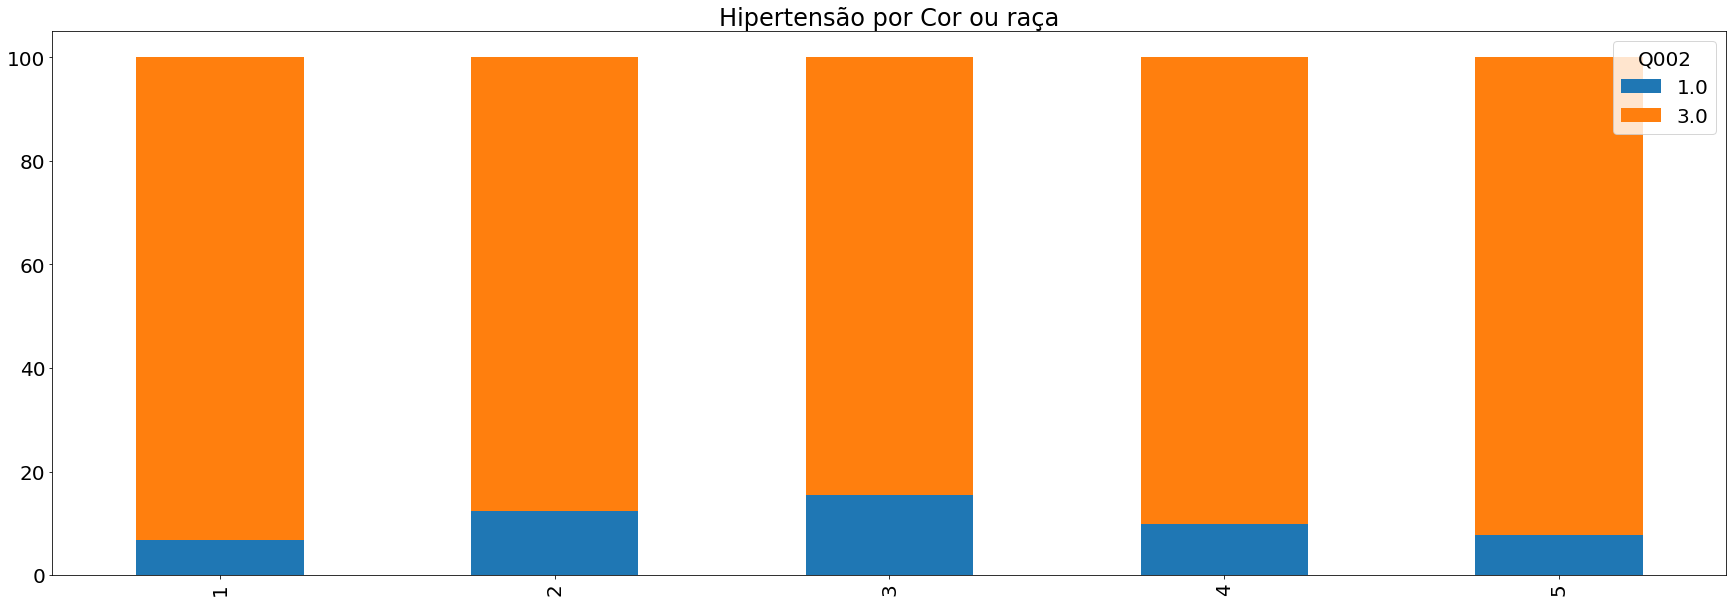

2.0    1457
1.0     955
Name: C010, dtype: int64 [1. 2.]


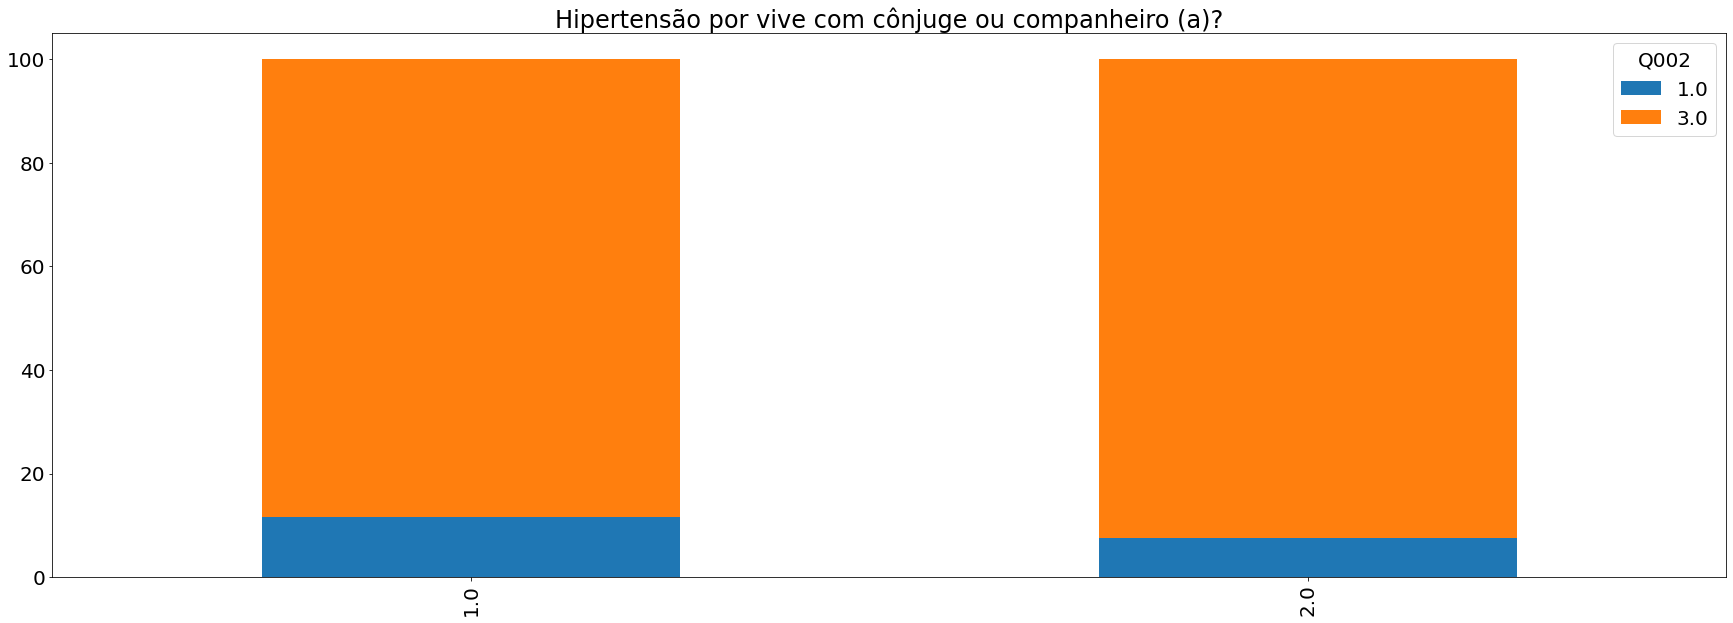

1.0    1288
2.0    1124
Name: E001, dtype: int64 [2. 1.]


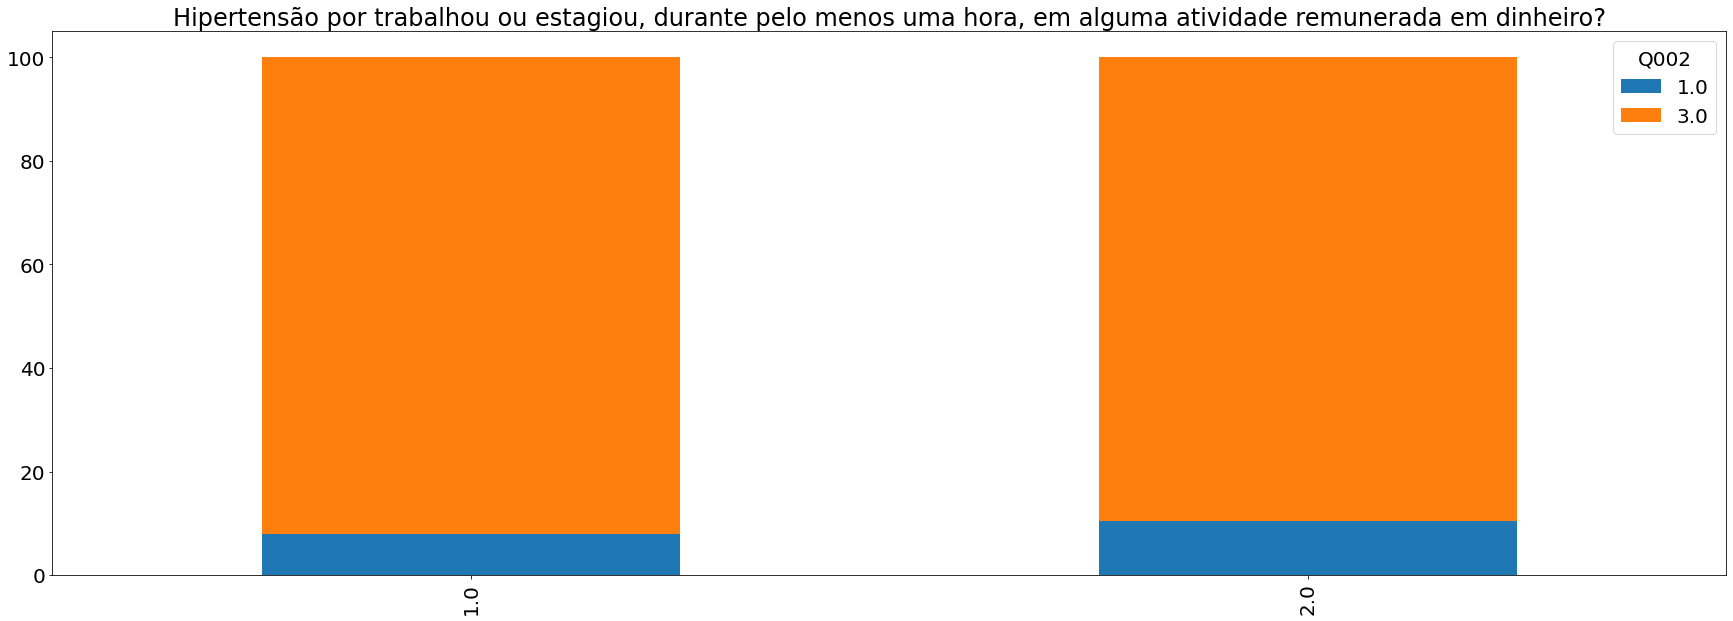

2.0    2358
1.0      54
Name: E003, dtype: int64 [2. 1.]


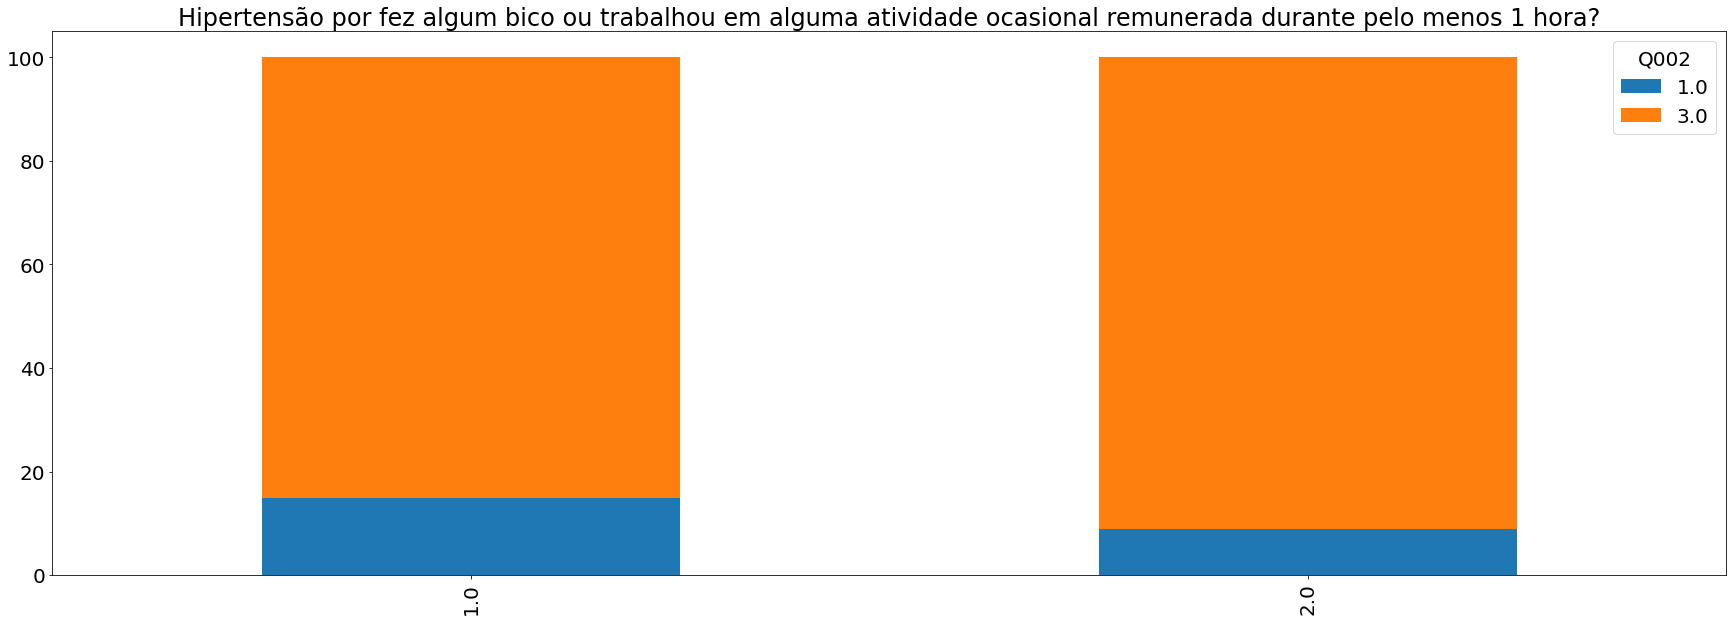

2    1561
3     429
1     375
4      39
5       8
Name: J001, dtype: int64 [3 2 4 1 5]


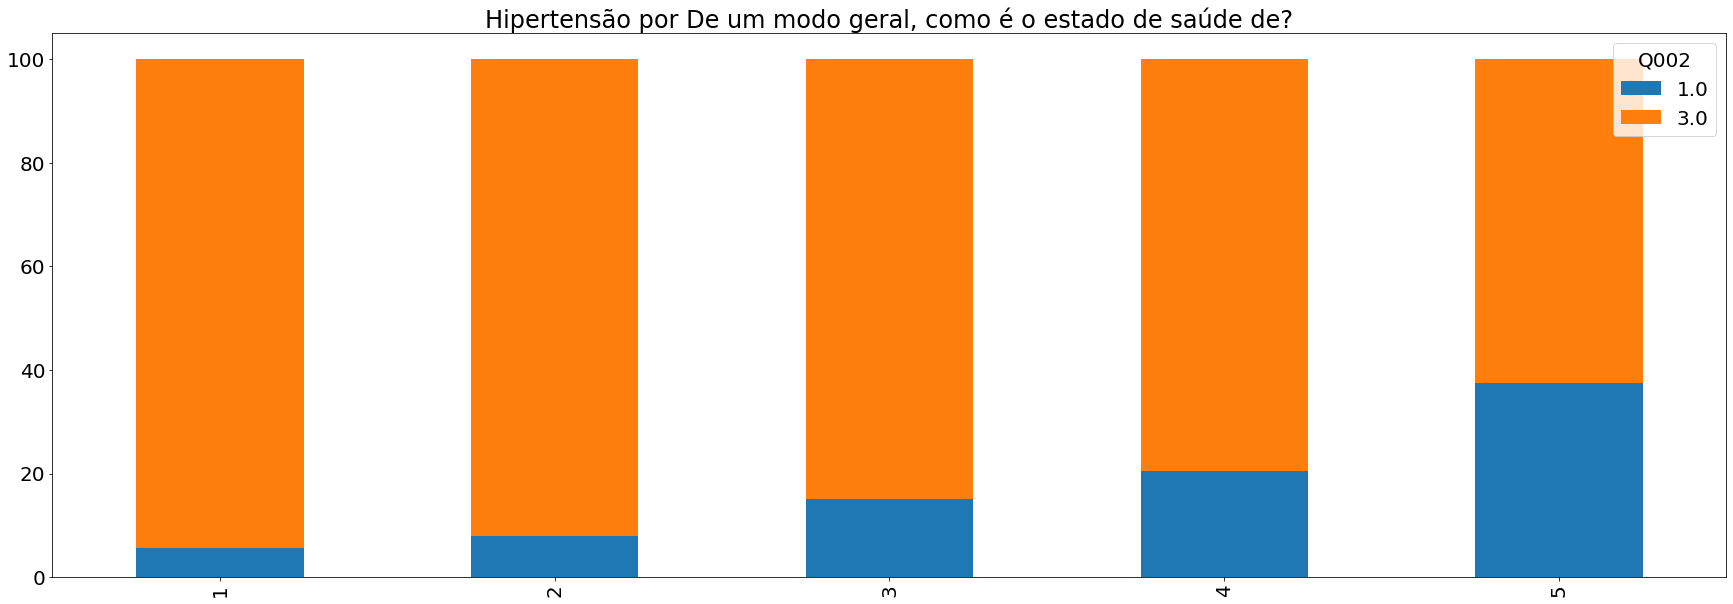

6.0    1482
1.0     400
2.0     215
4.0     168
3.0      99
5.0      48
Name: M016, dtype: int64 [6. 5. 4. 1. 2. 3.]


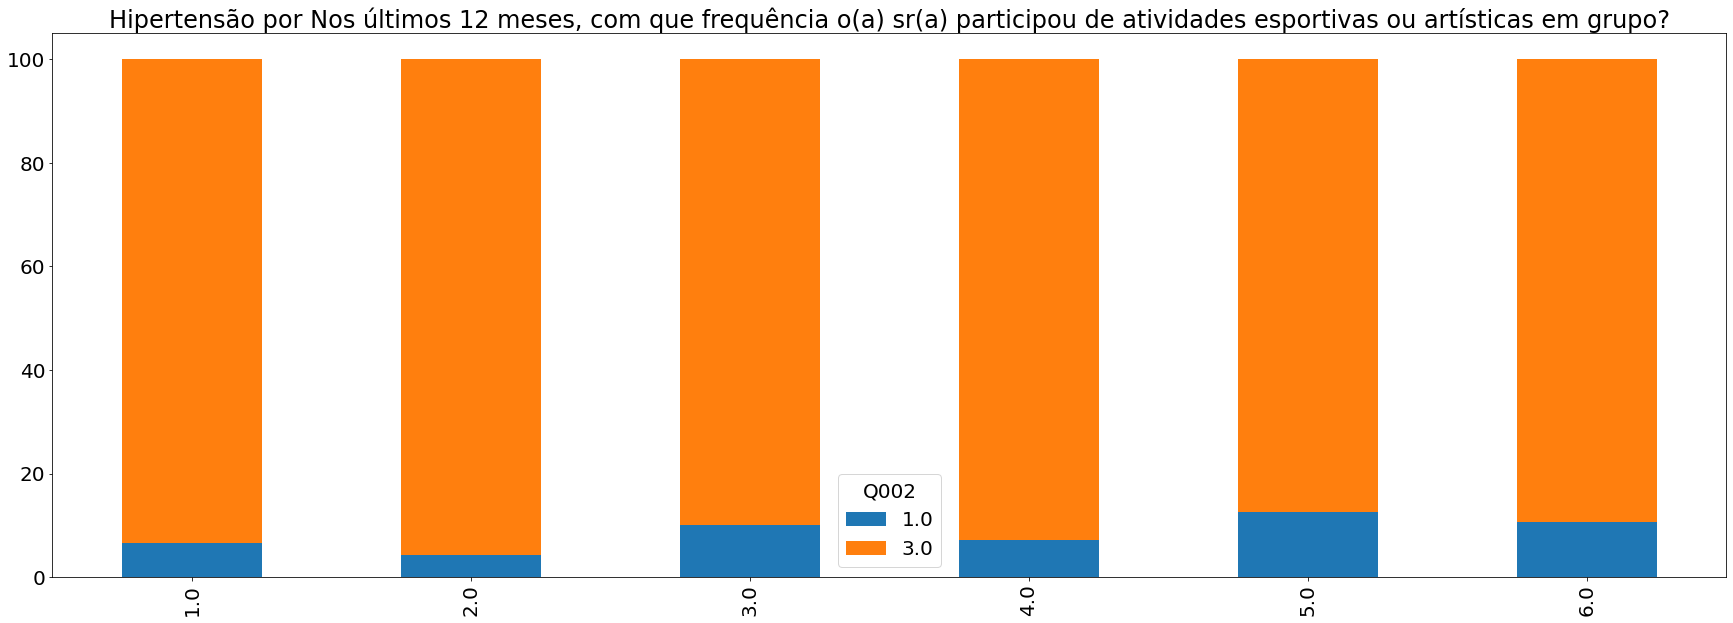

1.0    1841
2.0     298
4.0     185
3.0      88
Name: N010, dtype: int64 [1. 2. 4. 3.]


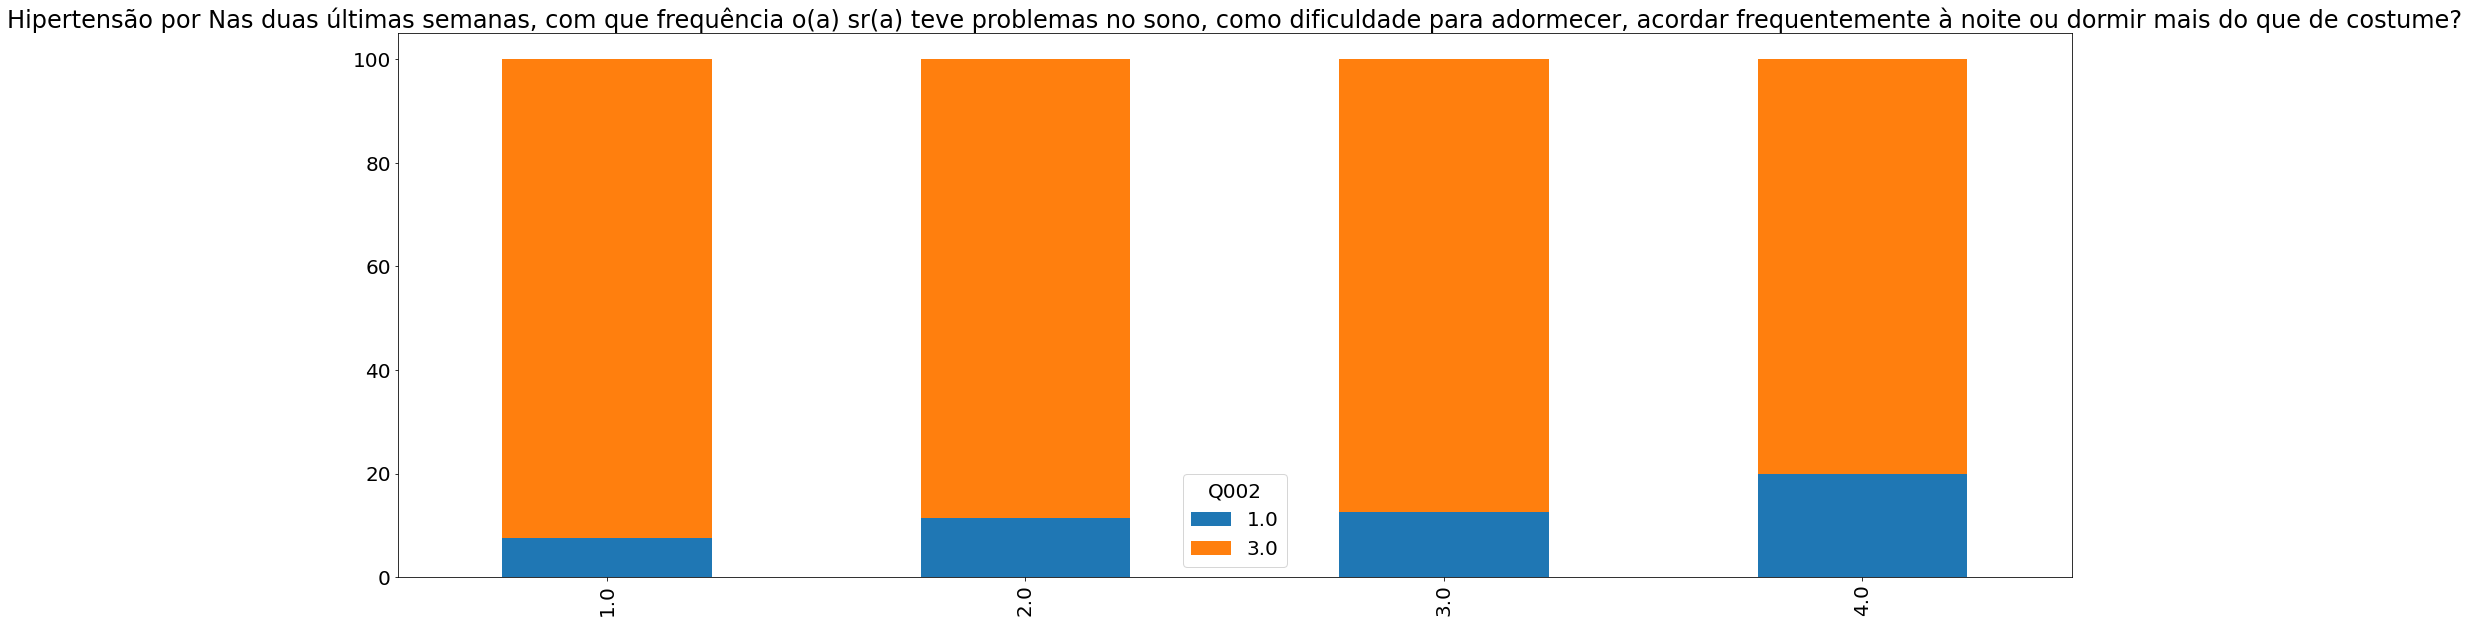

1.0    1715
2.0     435
4.0     150
3.0     112
Name: N011, dtype: int64 [2. 1. 4. 3.]


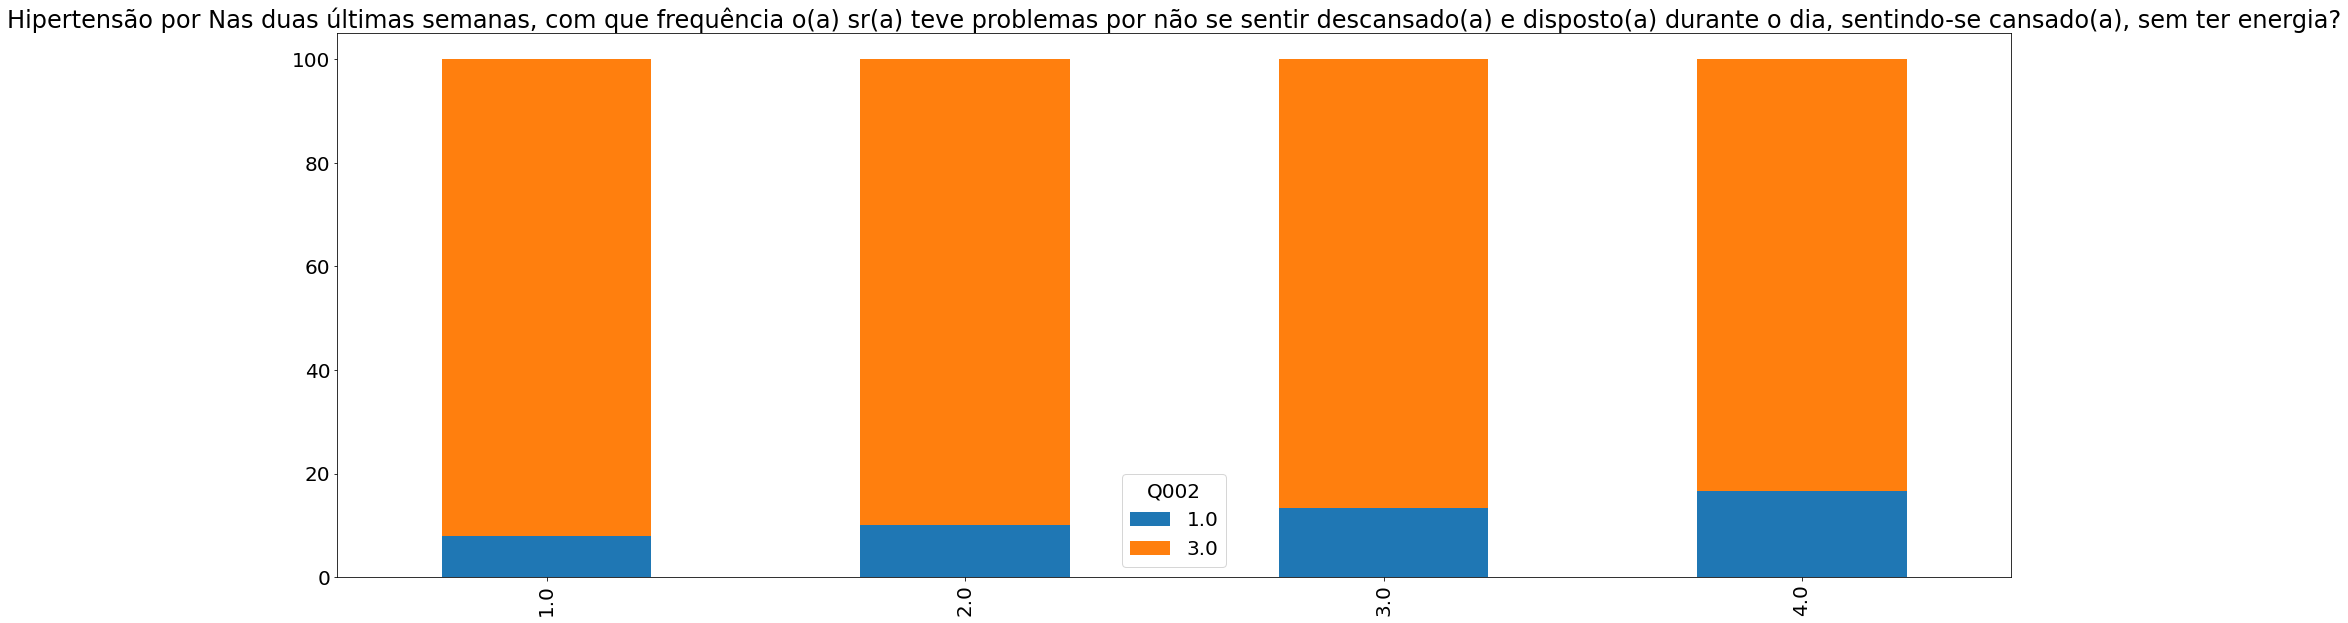

1.0    1805
2.0     423
4.0     100
3.0      84
Name: N012, dtype: int64 [2. 3. 1. 4.]


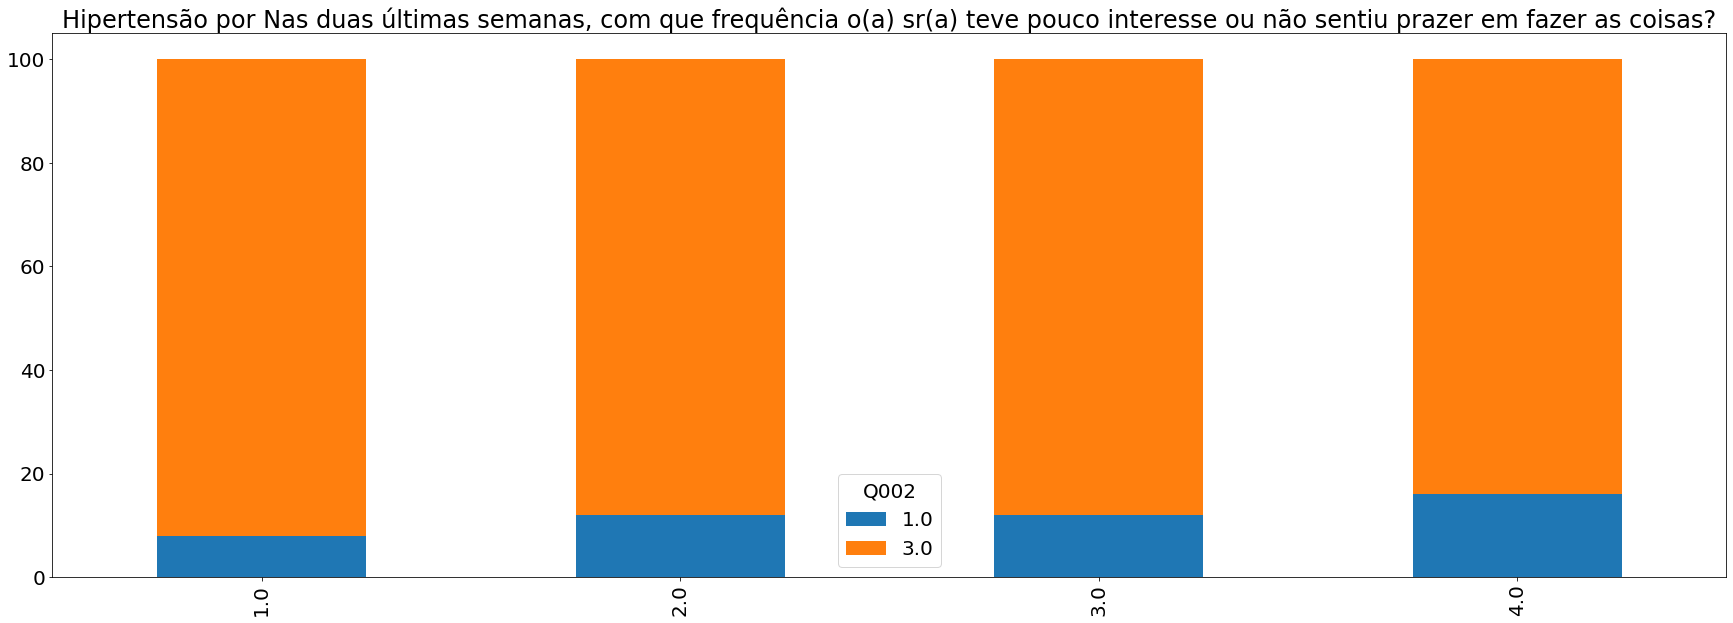

1.0    1976
2.0     302
4.0      72
3.0      62
Name: N013, dtype: int64 [2. 1. 3. 4.]


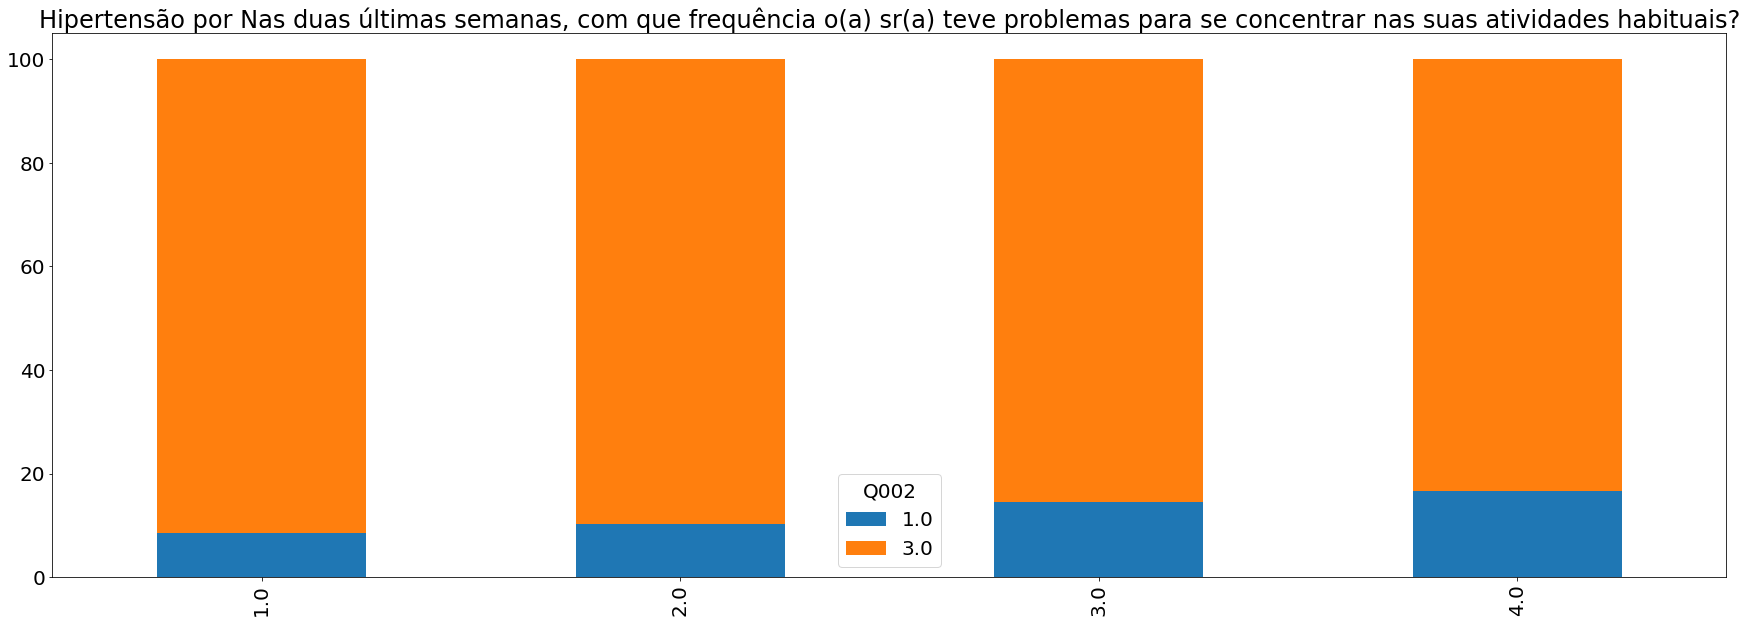

1.0    1932
2.0     268
4.0     110
3.0     102
Name: N014, dtype: int64 [1. 2. 3. 4.]


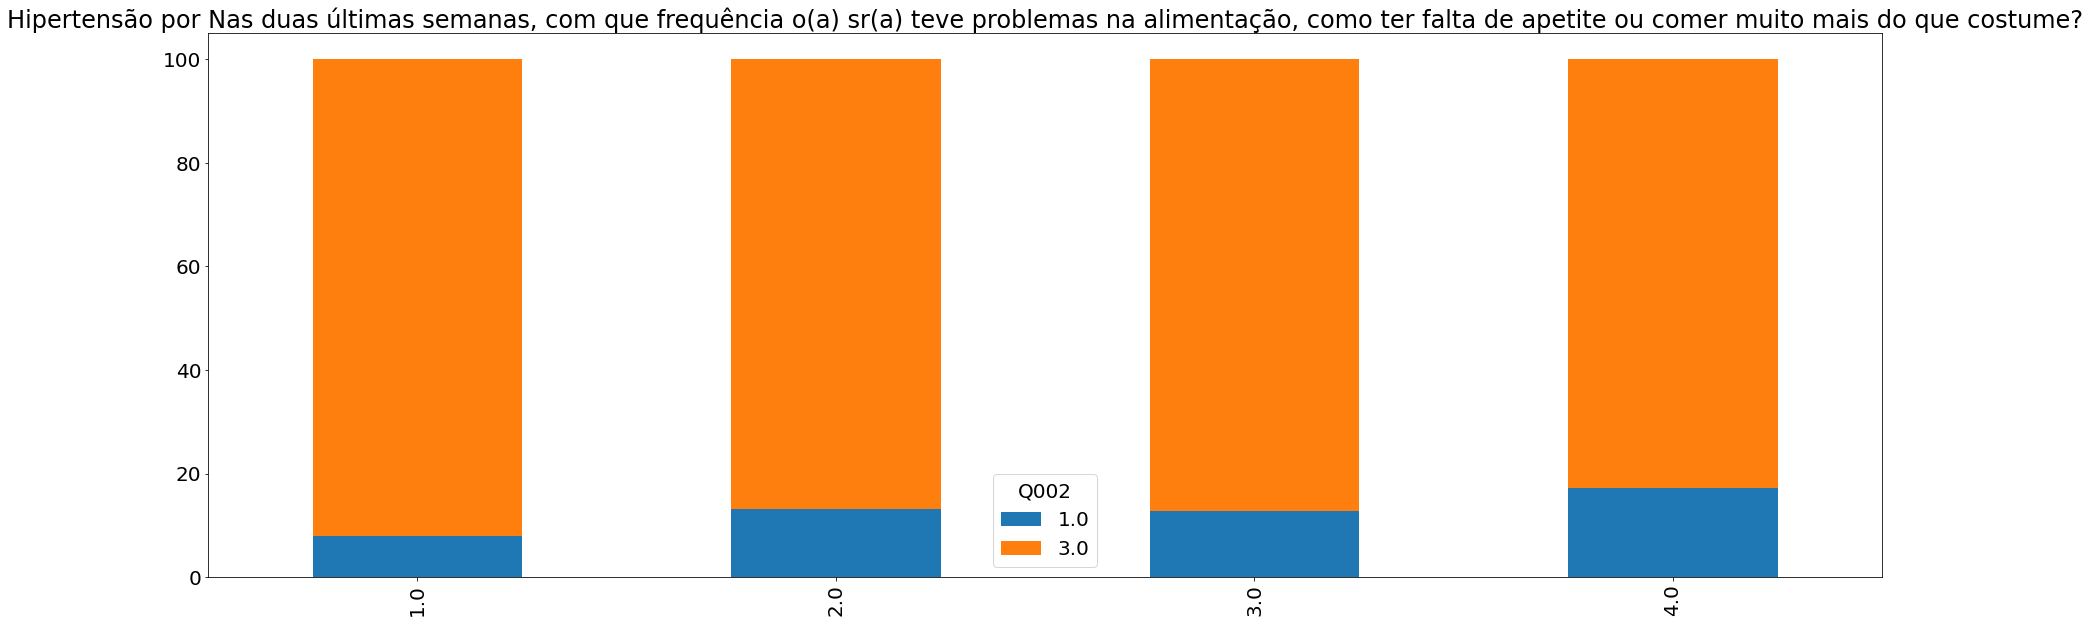

1.0    2125
2.0     163
4.0      72
3.0      52
Name: N015, dtype: int64 [1. 4. 2. 3.]


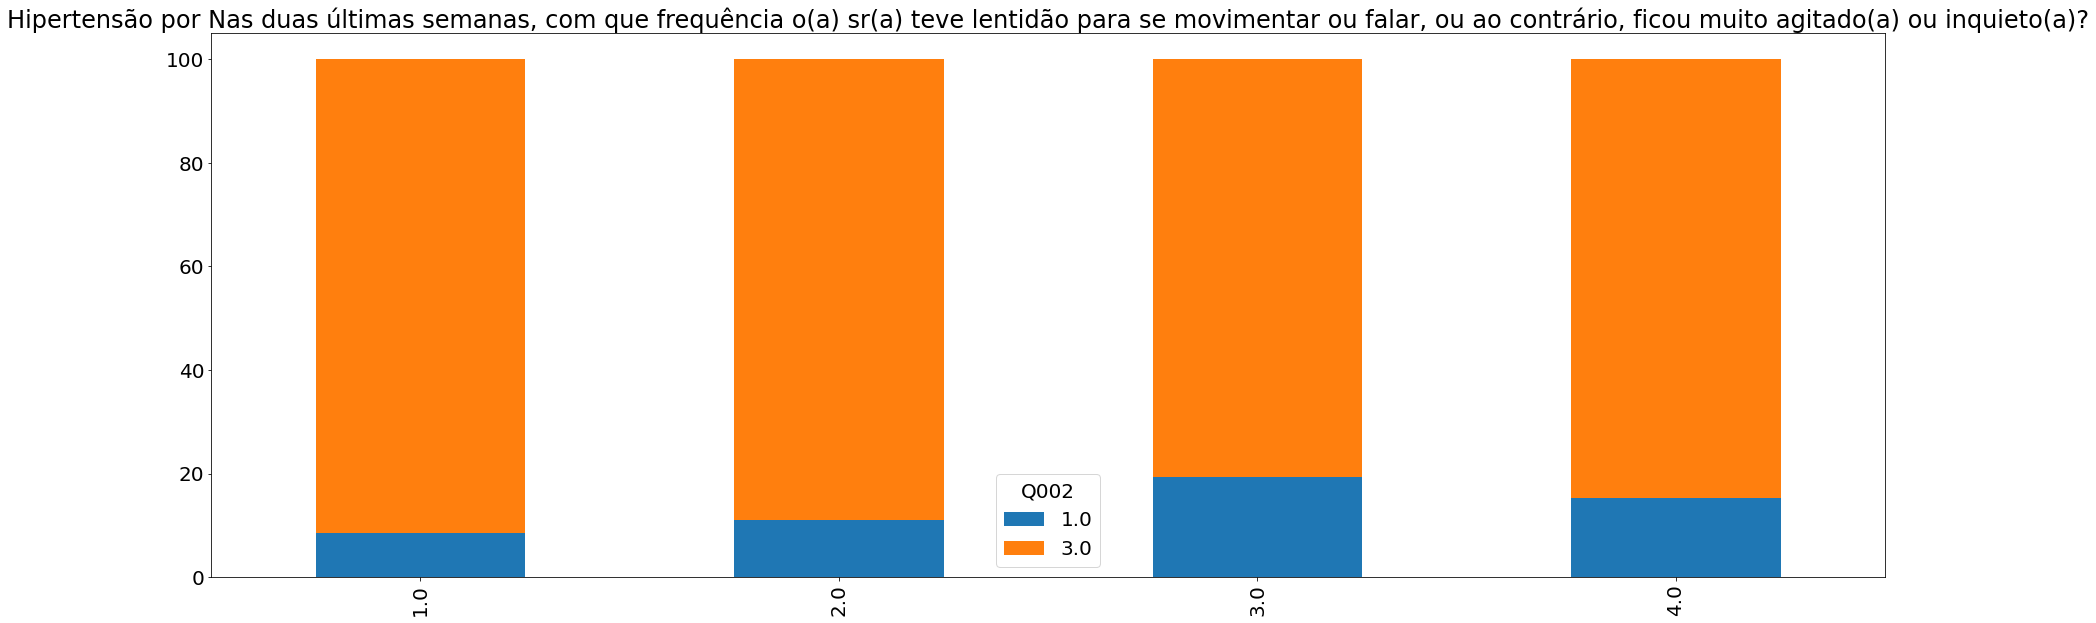

1.0    1935
2.0     330
3.0      79
4.0      68
Name: N016, dtype: int64 [2. 1. 4. 3.]


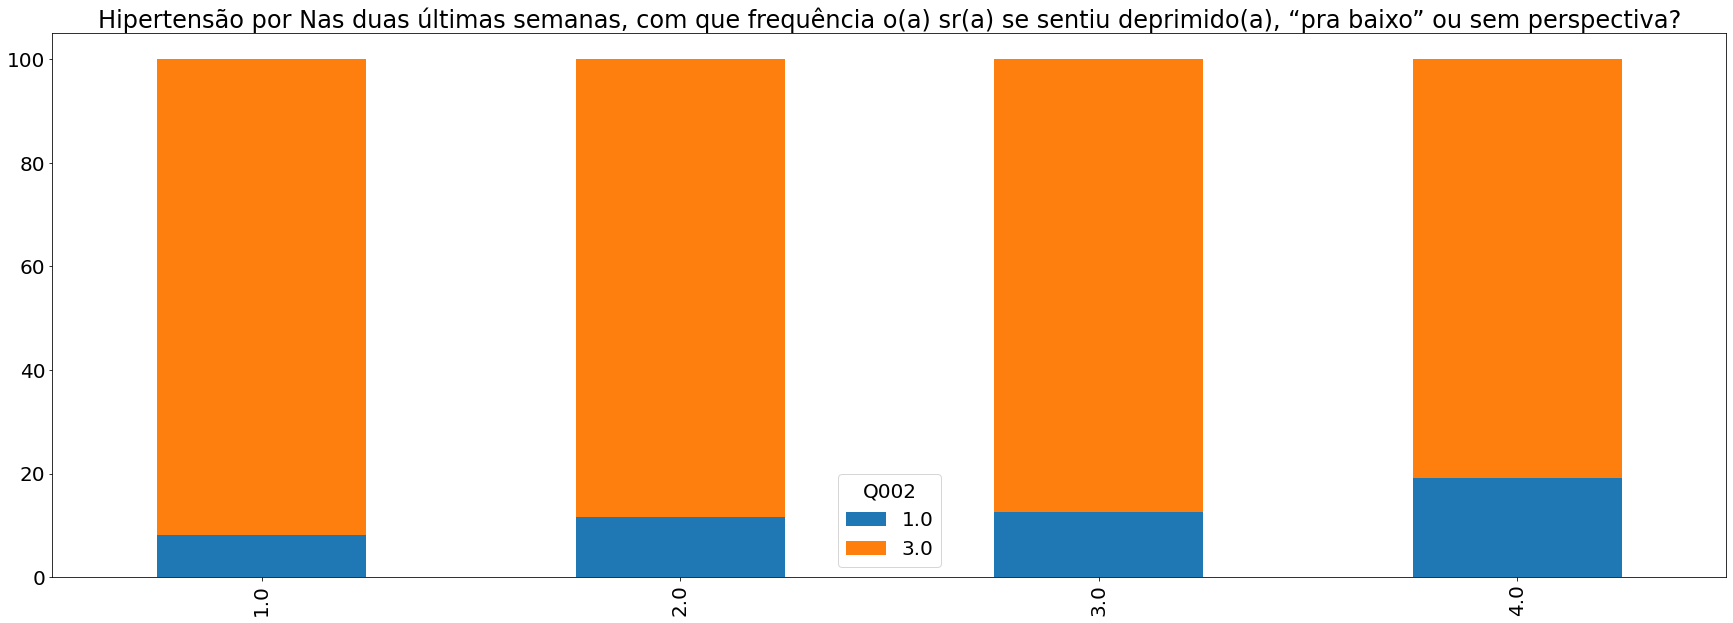

1.0    2115
2.0     194
4.0      54
3.0      49
Name: N017, dtype: int64 [1. 4. 2. 3.]


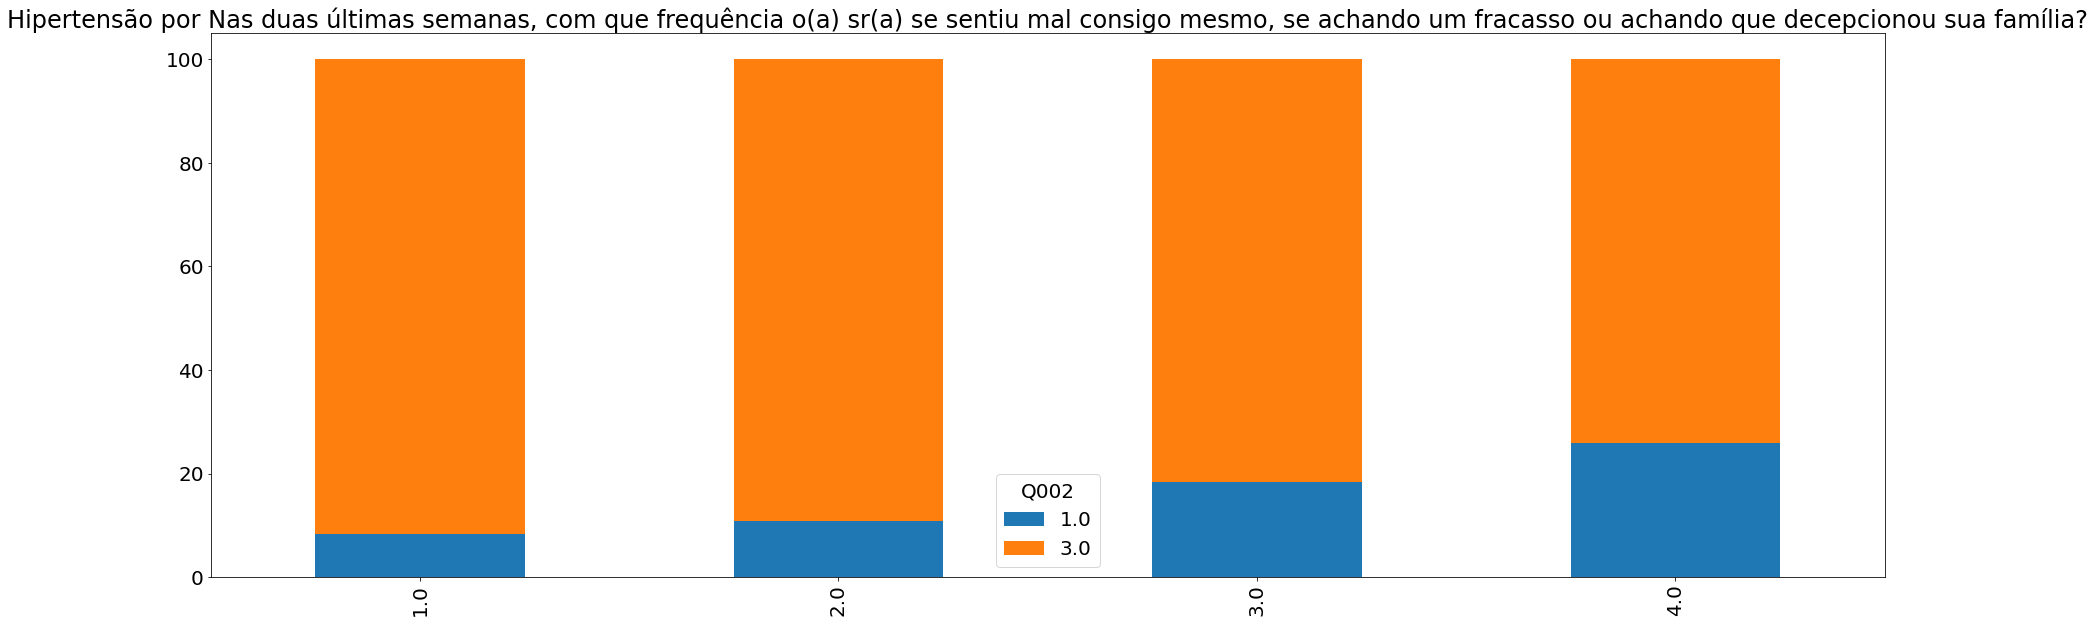

7    1295
3     228
5     190
4     170
2     164
6     132
1     117
0     116
Name: P006, dtype: int64 [2 0 6 7 3 5 4 1]


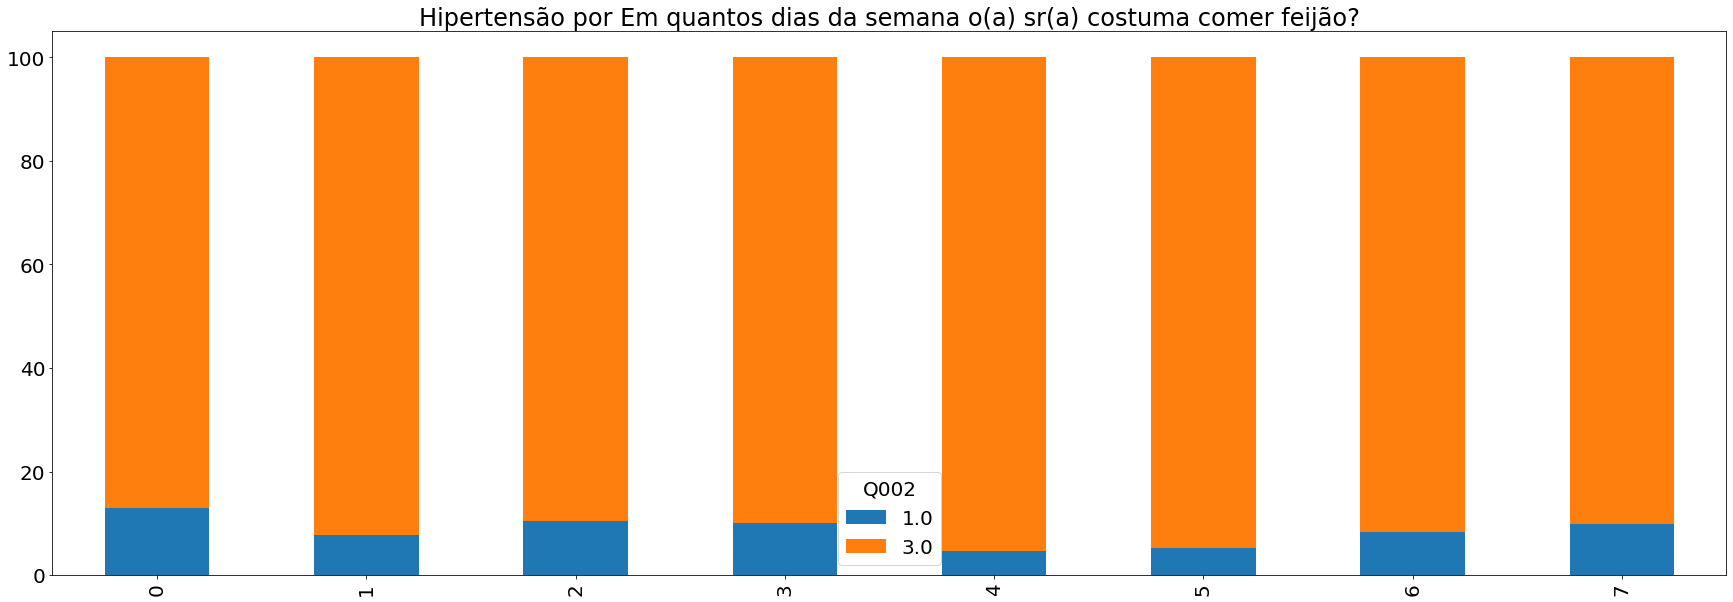

7    594
0    408
3    386
2    313
1    261
4    180
5    170
6    100
Name: P007, dtype: int64 [3 0 5 7 6 2 1 4]


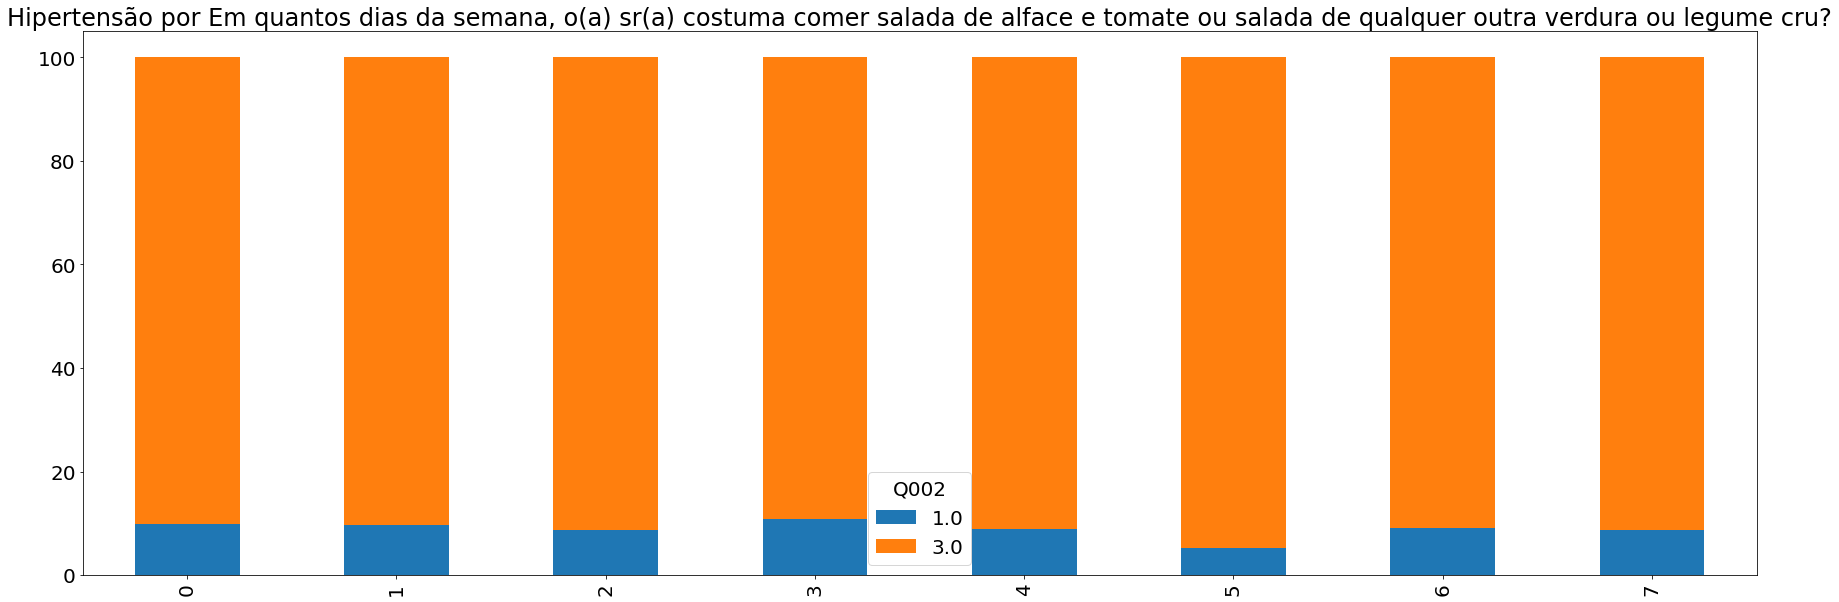

0    583
2    411
3    402
7    348
1    303
4    154
5    138
6     73
Name: P009, dtype: int64 [3 0 2 1 4 7 6 5]


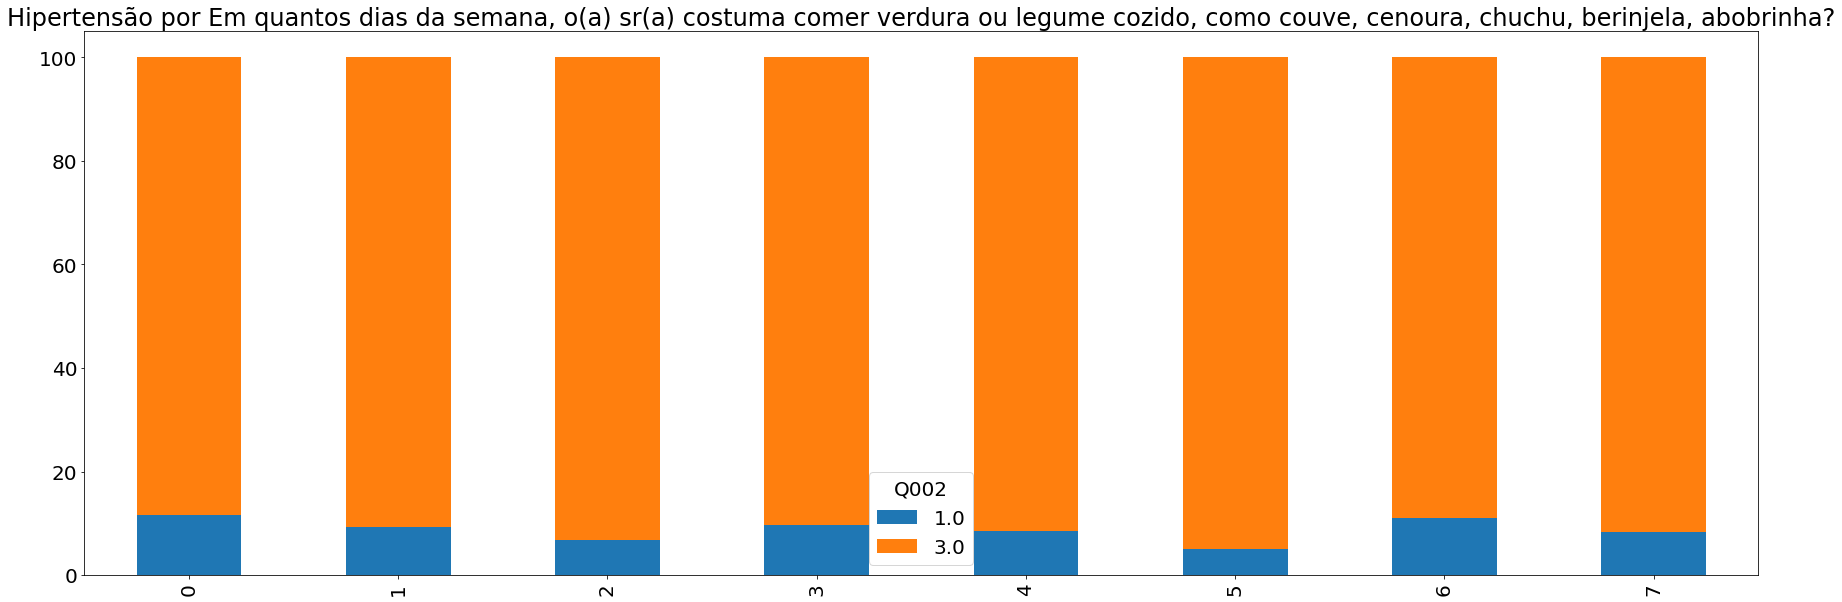

7    551
3    488
4    387
2    318
5    277
1    160
6    149
0     82
Name: P011, dtype: int64 [3 7 0 5 4 2 1 6]


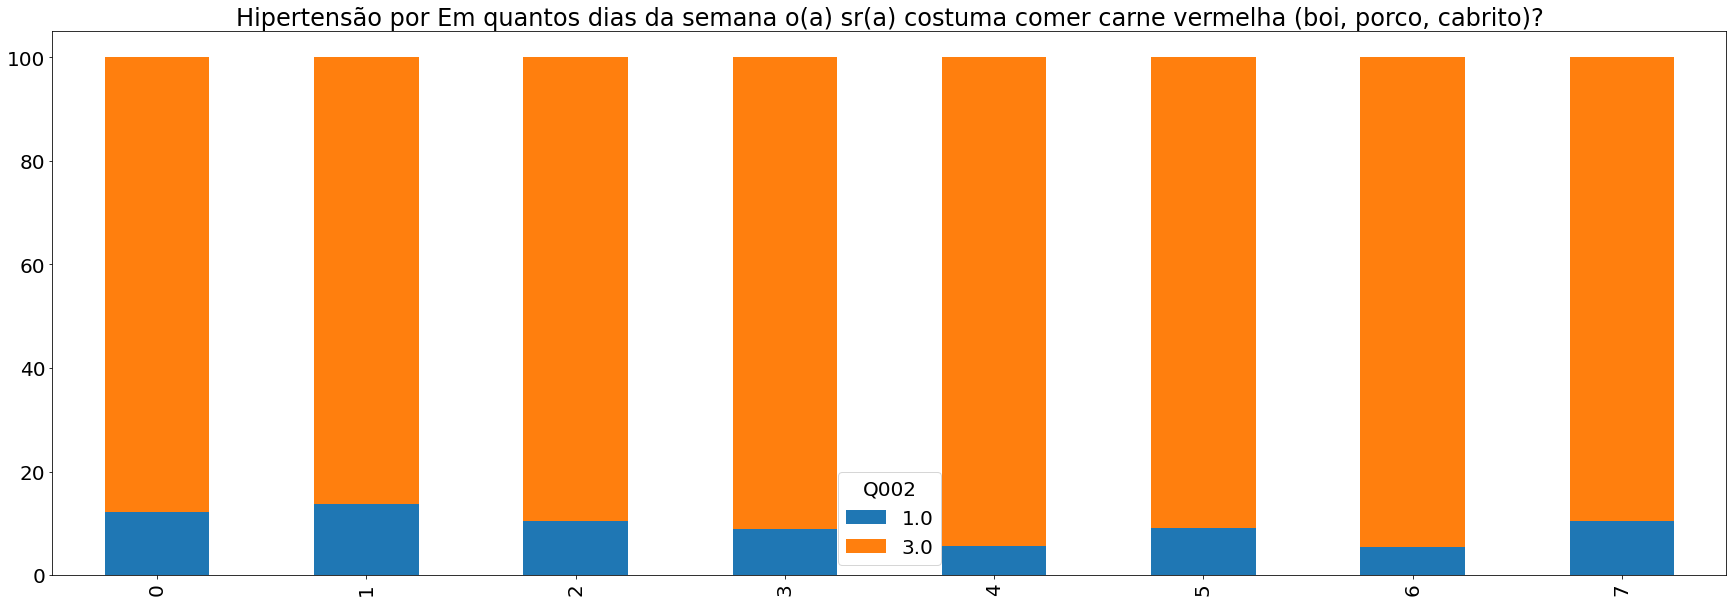

2    661
3    631
1    350
4    273
5    162
0    143
7    118
6     74
Name: P013, dtype: int64 [2 3 0 1 7 6 4 5]


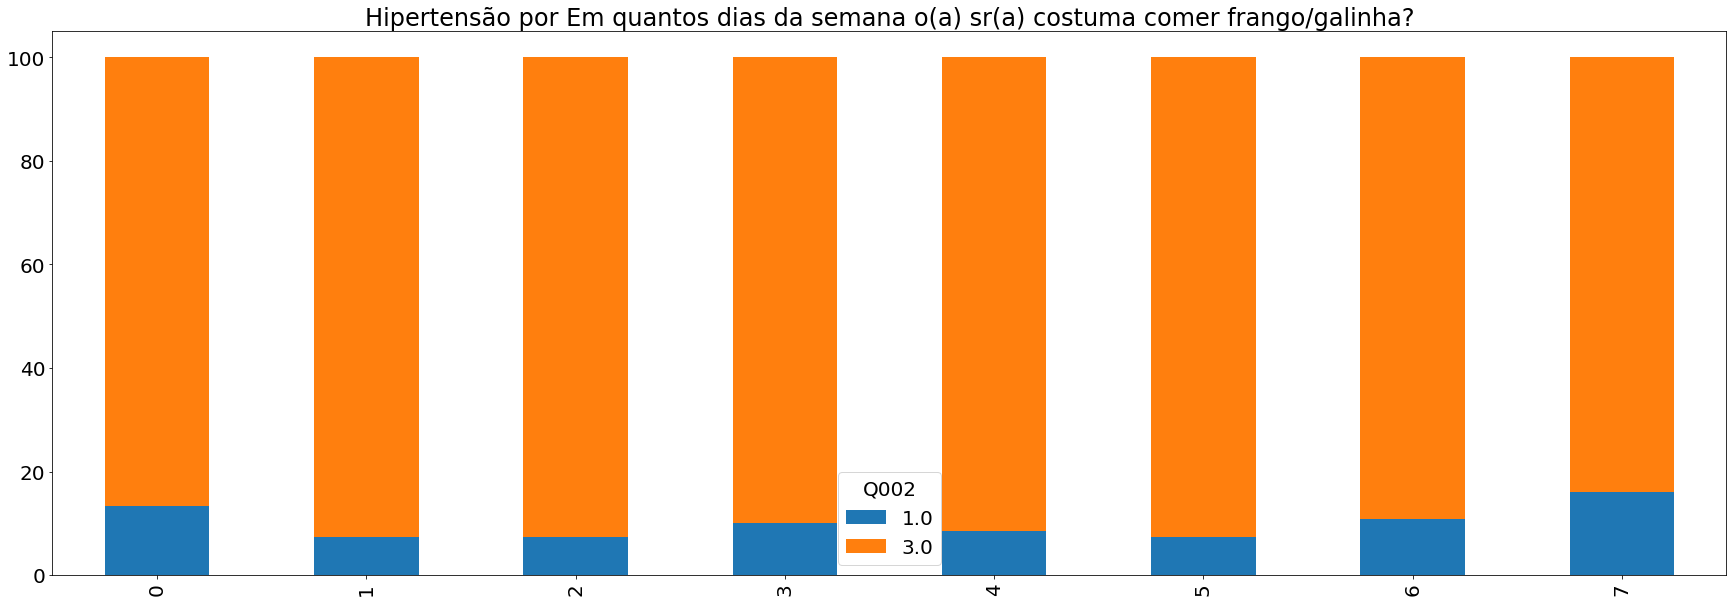

0    1142
1     748
2     280
3     114
4      41
5      36
7      29
6      22
Name: P015, dtype: int64 [4 1 0 2 3 6 5 7]


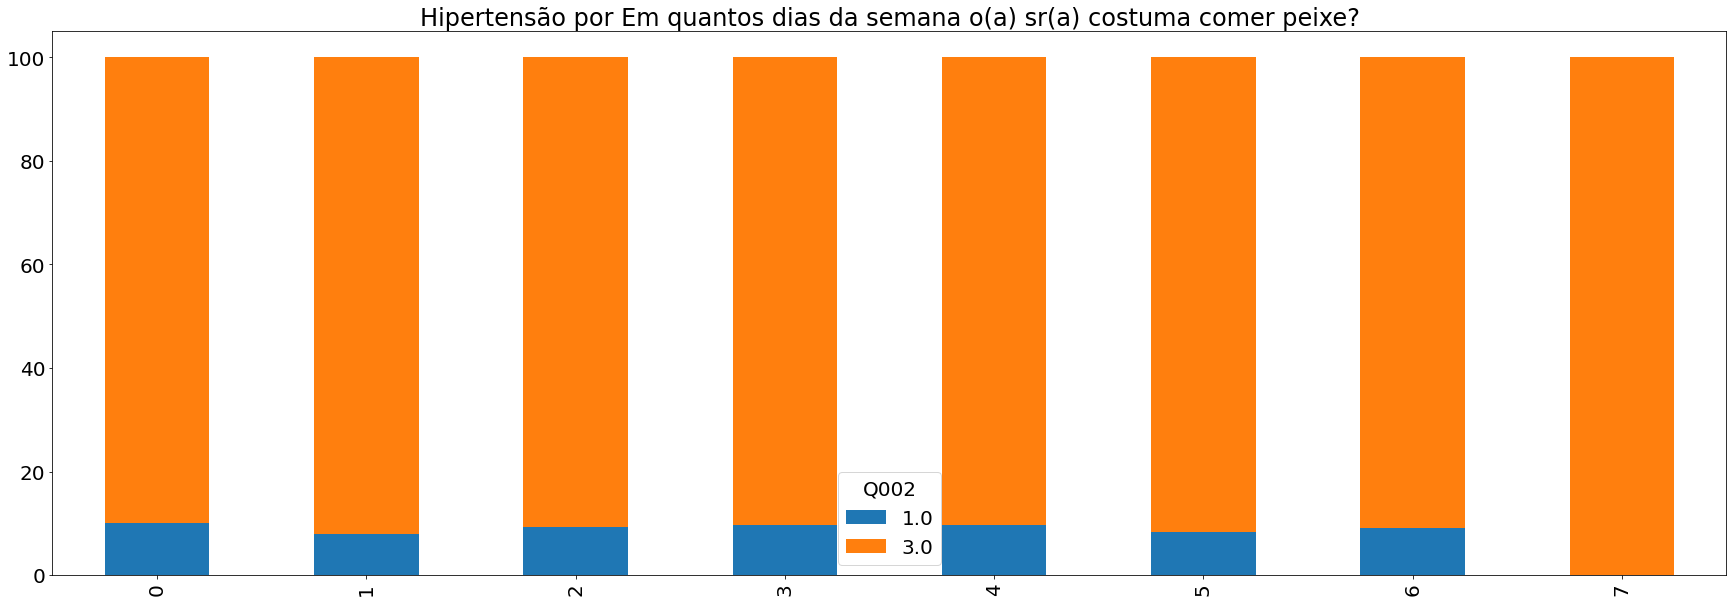

0    638
7    424
2    344
3    326
1    277
4    161
5    148
6     94
Name: P016, dtype: int64 [2 1 0 3 4 7 5 6]


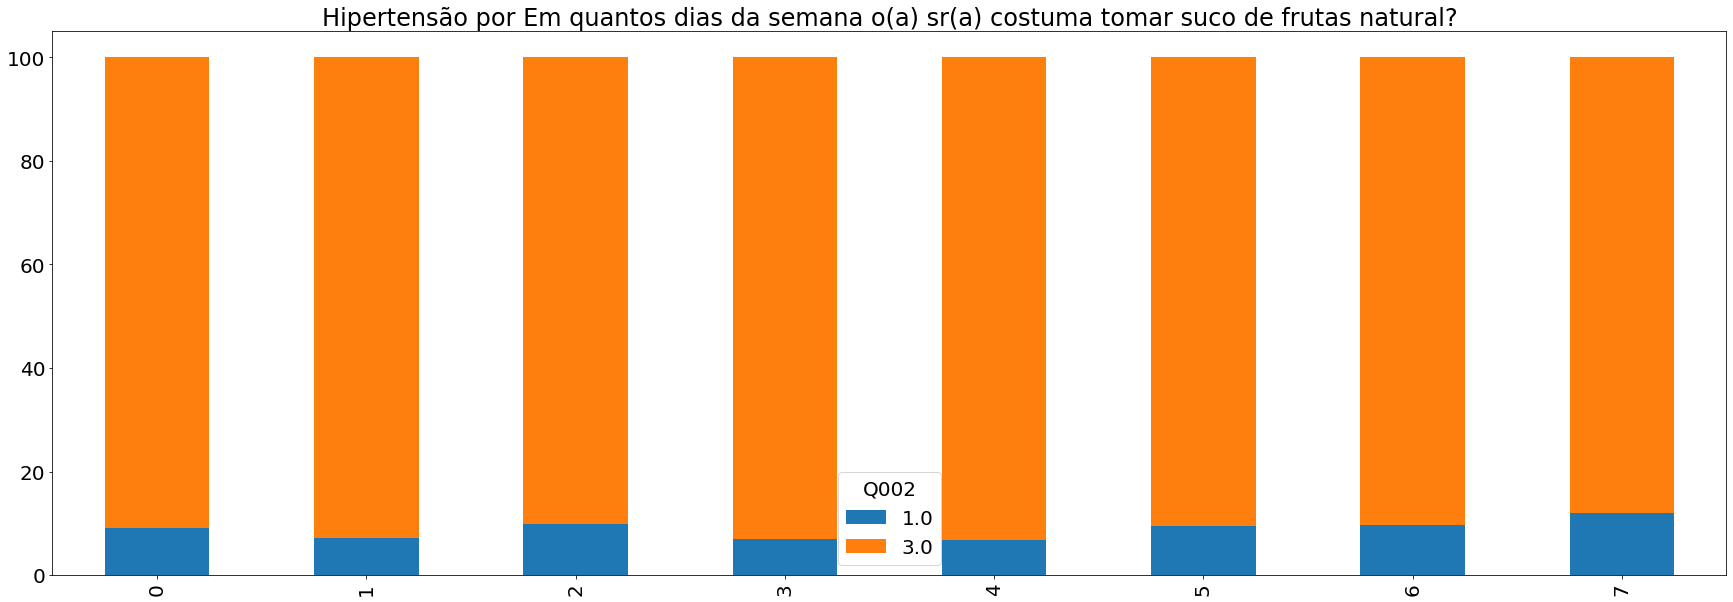

7    507
2    413
3    383
0    332
1    268
4    248
5    152
6    109
Name: P018, dtype: int64 [4 6 0 1 7 3 5 2]


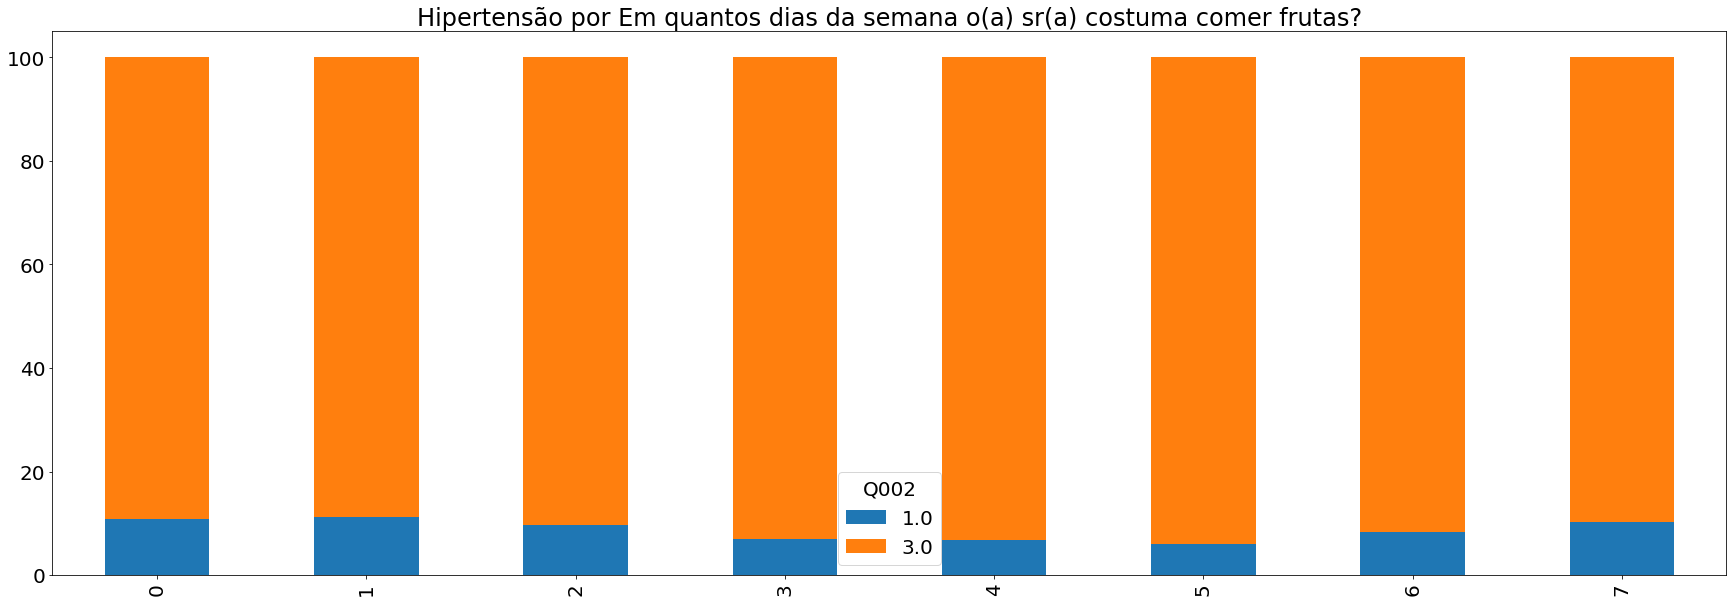

7    515
0    408
2    393
1    349
3    257
5    189
4    173
6    128
Name: P020, dtype: int64 [5 0 7 2 1 3 4 6]


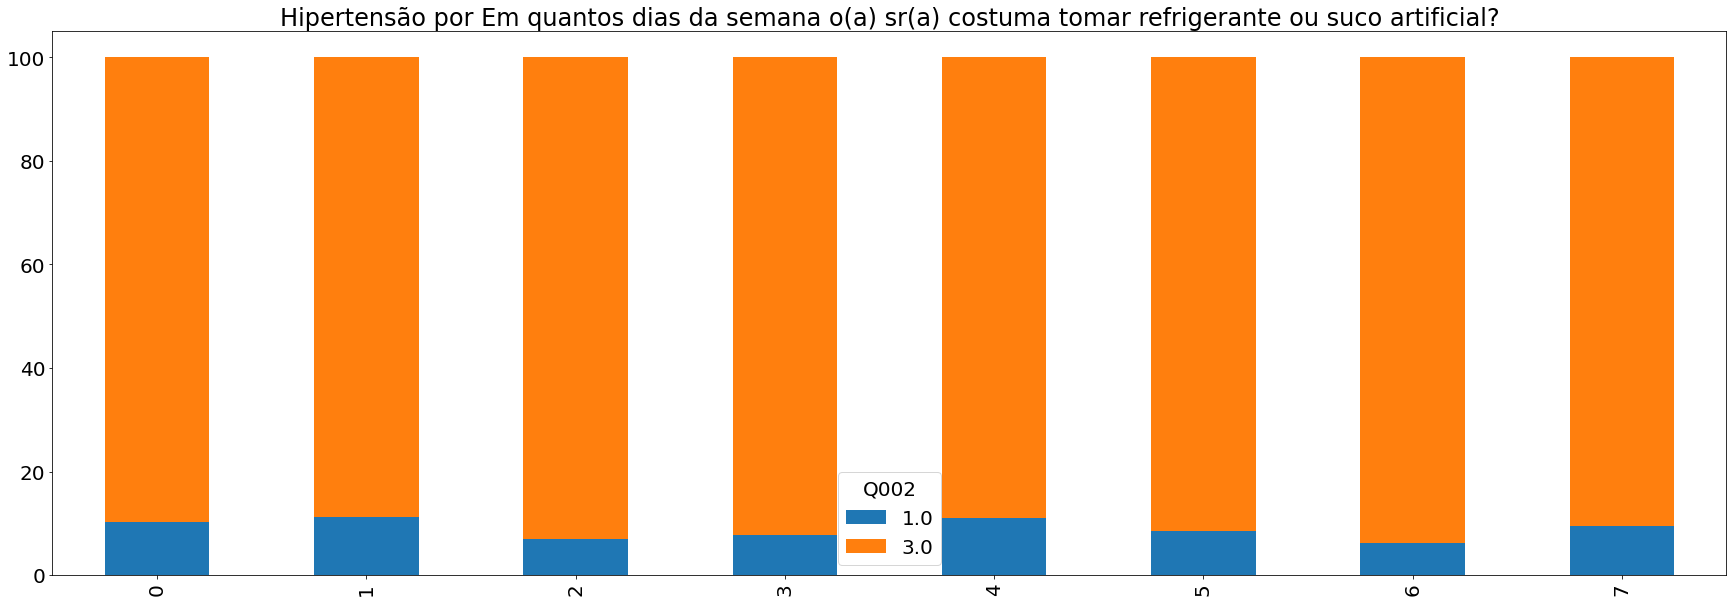

7    905
0    672
2    201
3    178
1    168
4    112
5     94
6     82
Name: P023, dtype: int64 [7 0 3 4 1 6 5 2]


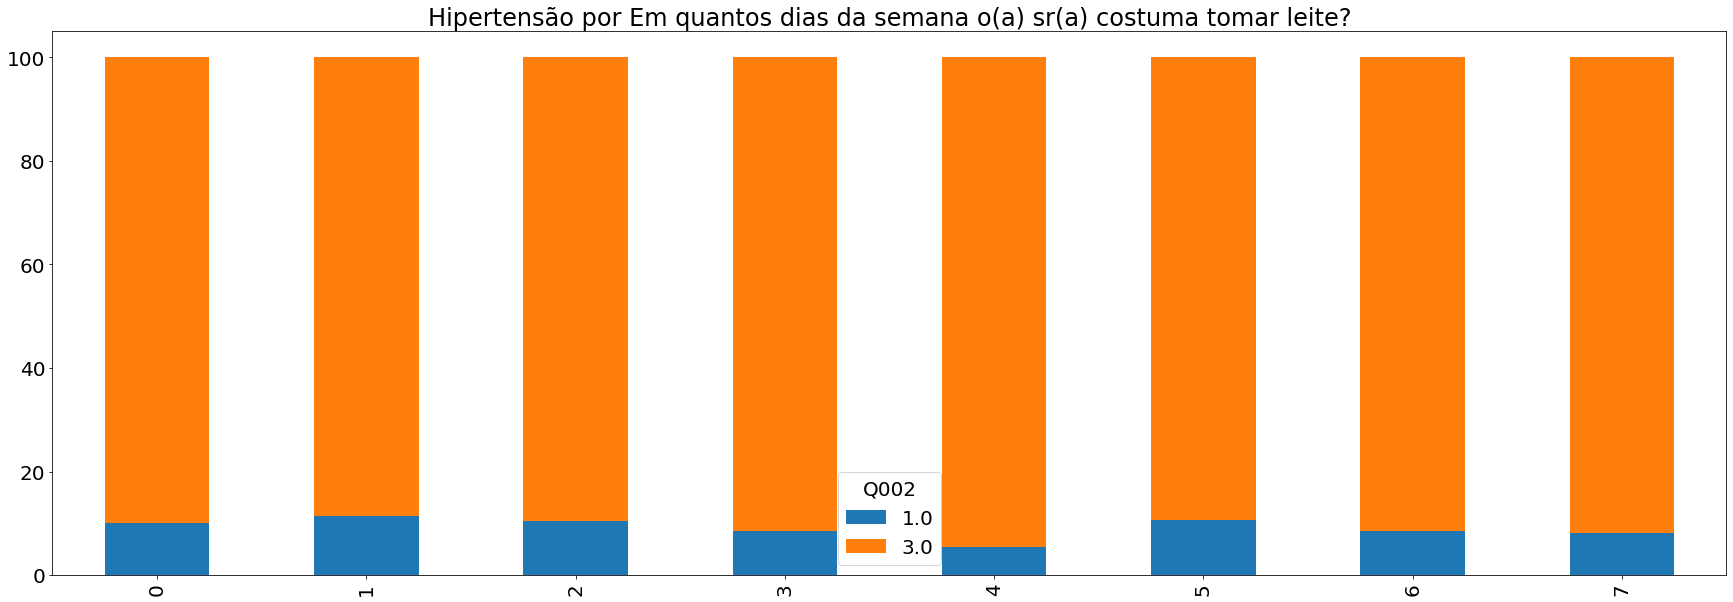

7    490
0    417
2    398
1    389
3    327
4    179
5    122
6     90
Name: P025, dtype: int64 [7 0 4 3 1 5 2 6]


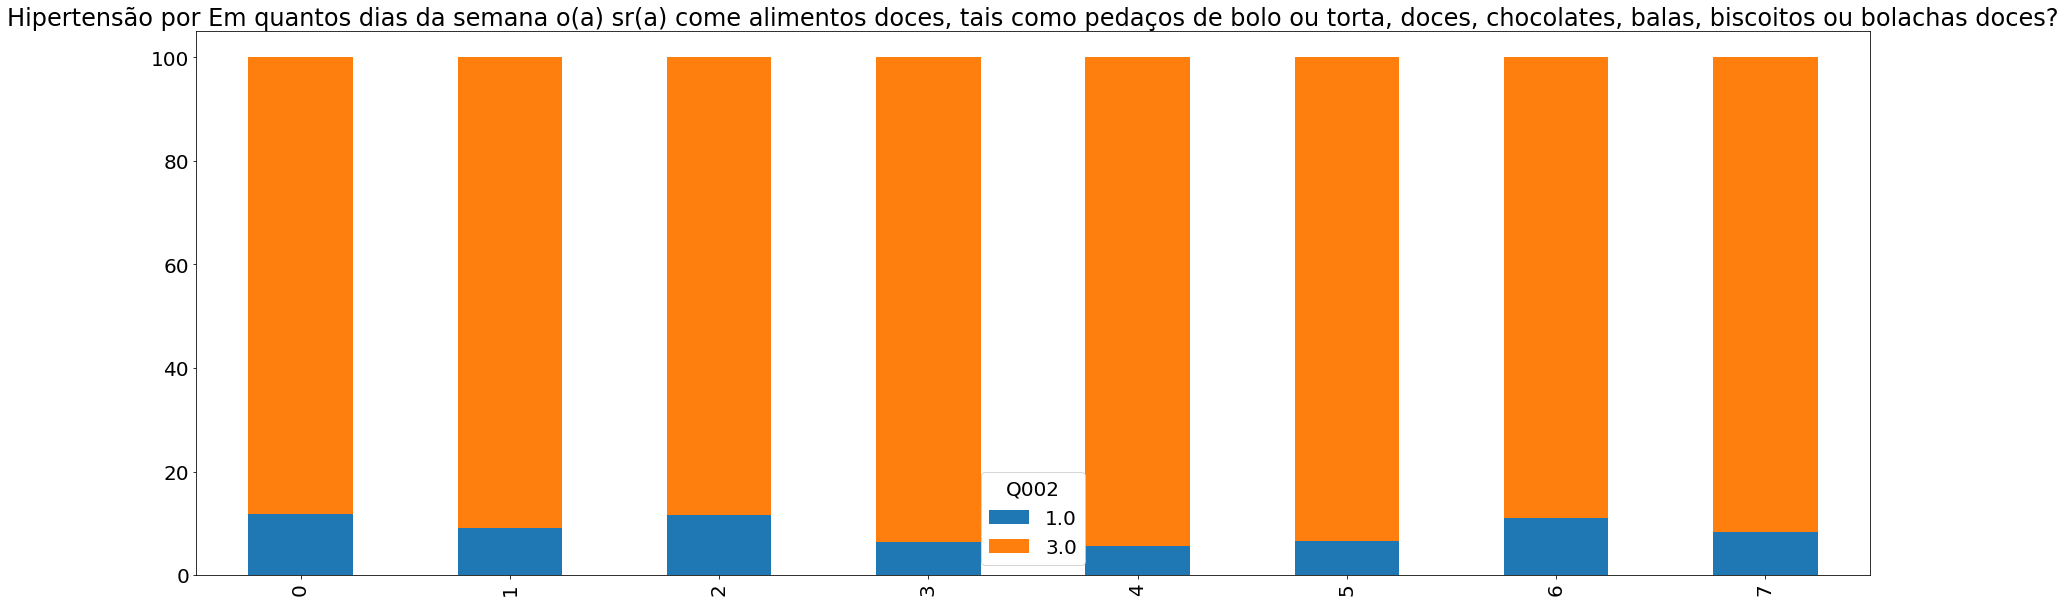

0    1175
1     389
2     377
3     211
7      97
4      81
5      59
6      23
Name: P026, dtype: int64 [2 7 0 1 3 6 4 5]


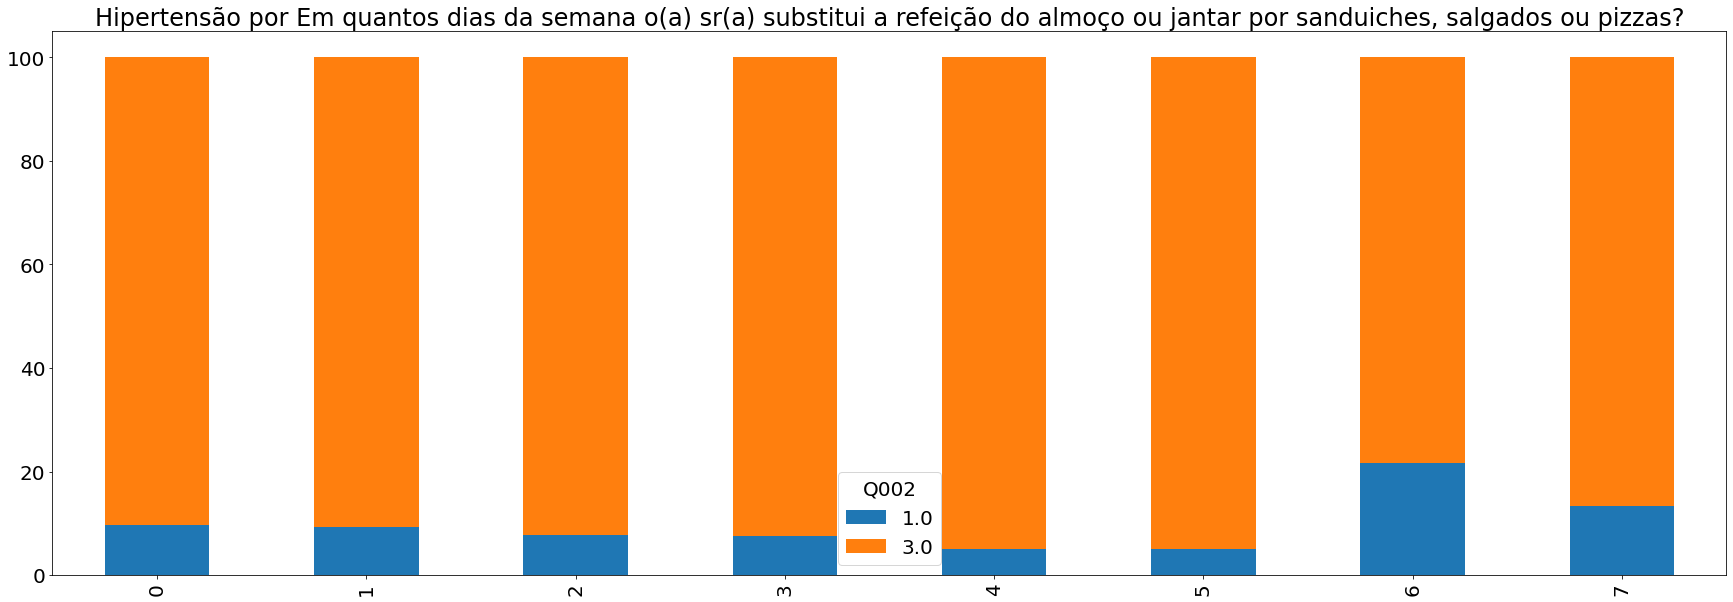

3.0    1623
2.0     365
4.0     324
1.0      72
5.0      28
Name: P02601, dtype: int64 [4. 3. 2. 1. 5.]


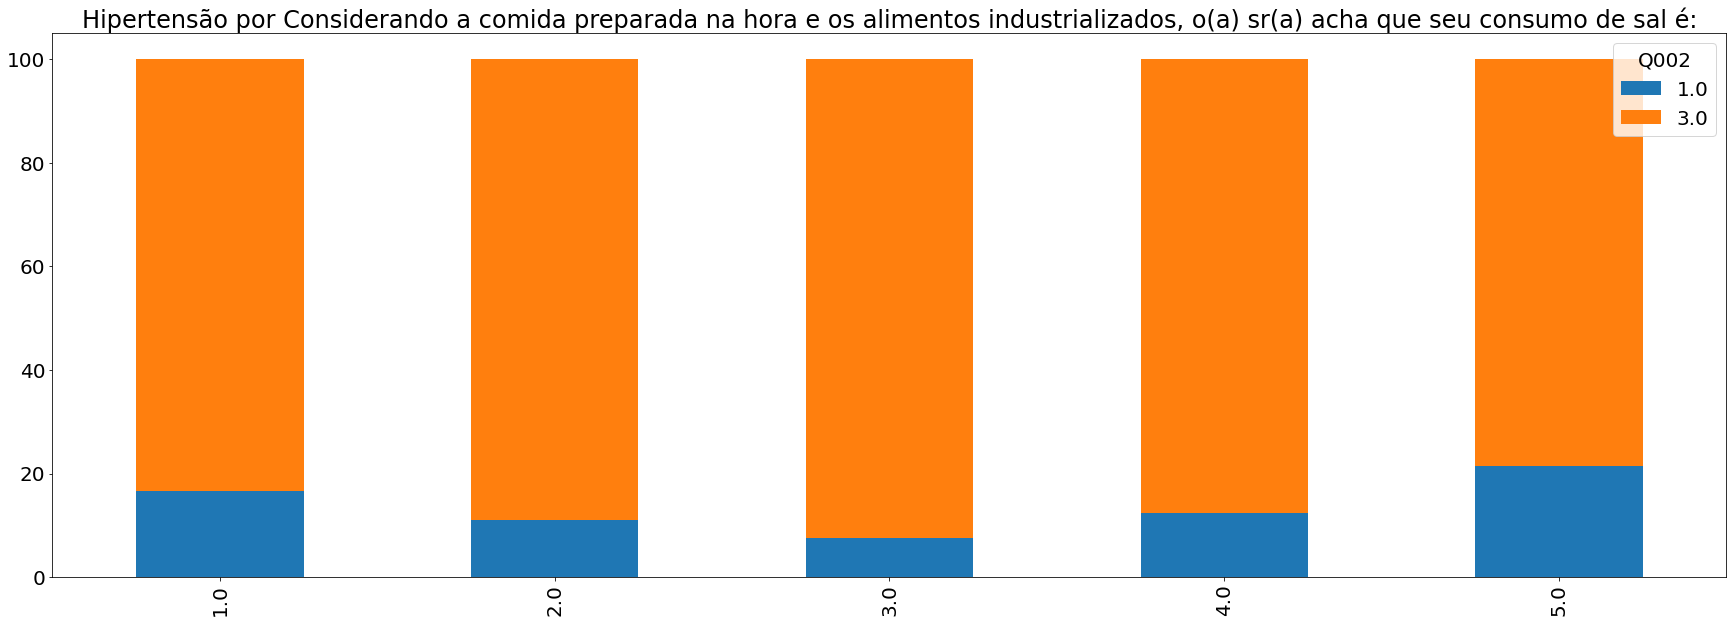

2.0    1453
1.0     959
Name: P034, dtype: int64 [2. 1.]


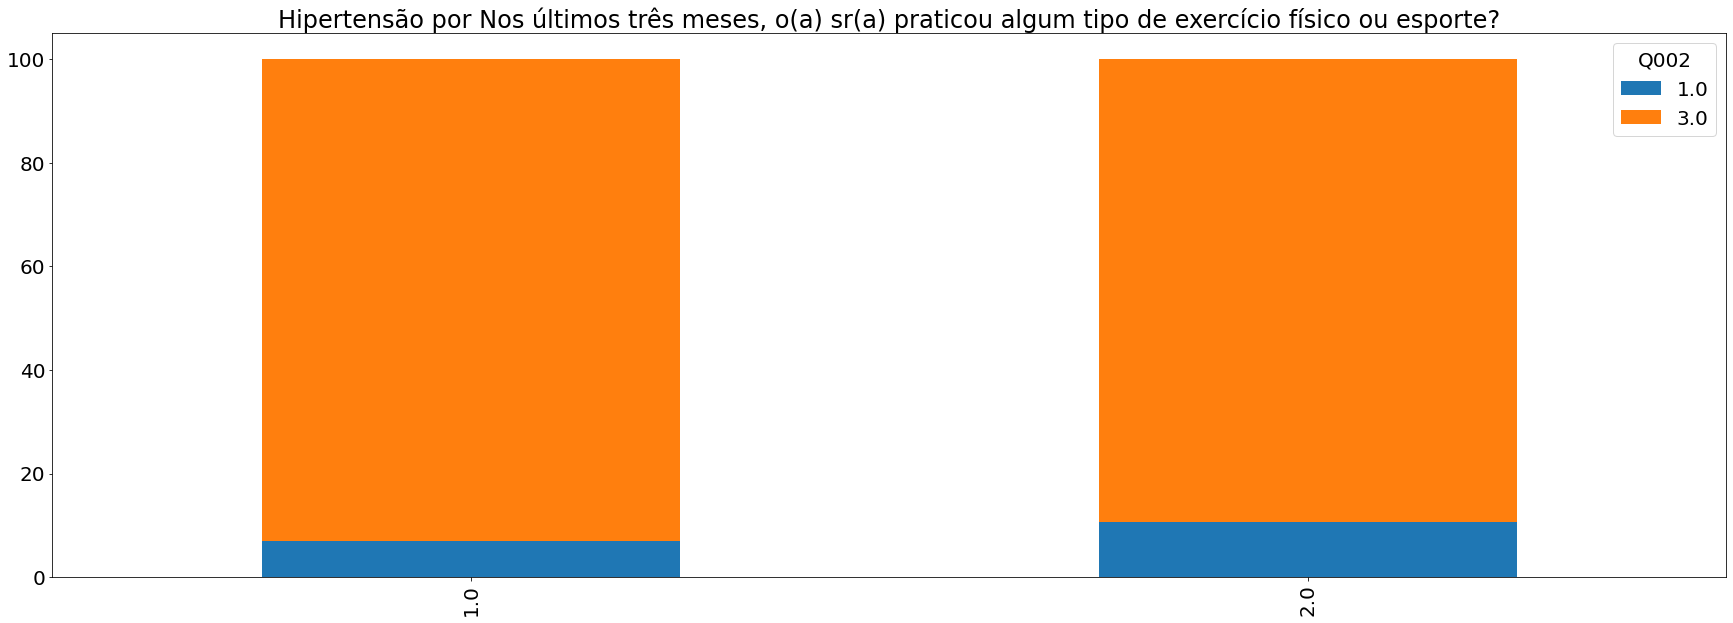

0    1480
5     255
7     199
2     134
3     105
1     104
4      72
6      63
Name: P042, dtype: int64 [0 5 7 3 2 4 1 6]


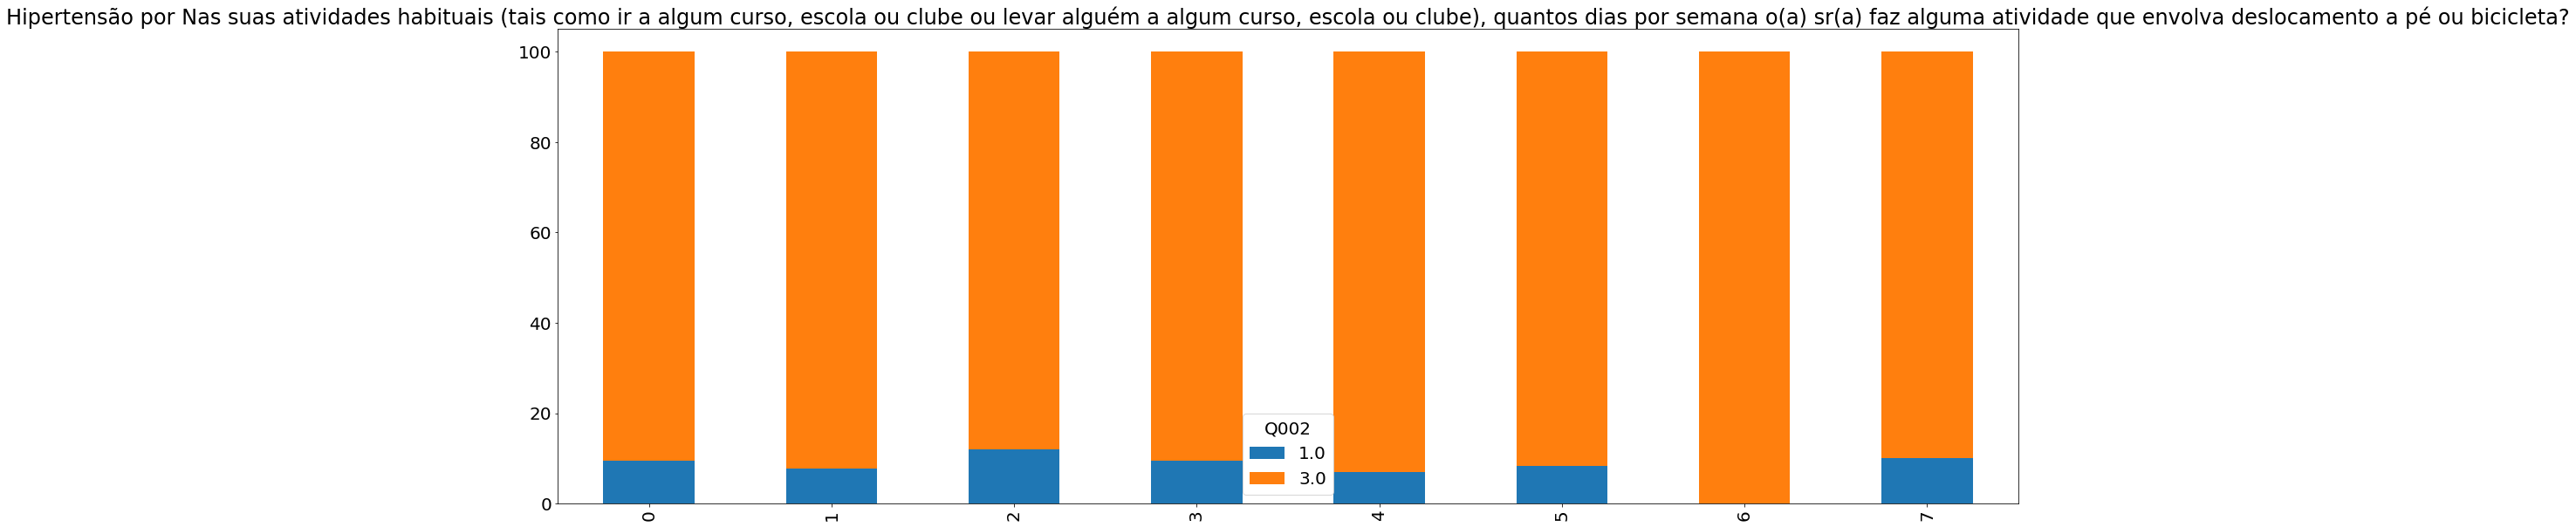

2.0    2038
1.0     374
Name: P044, dtype: int64 [2. 1.]


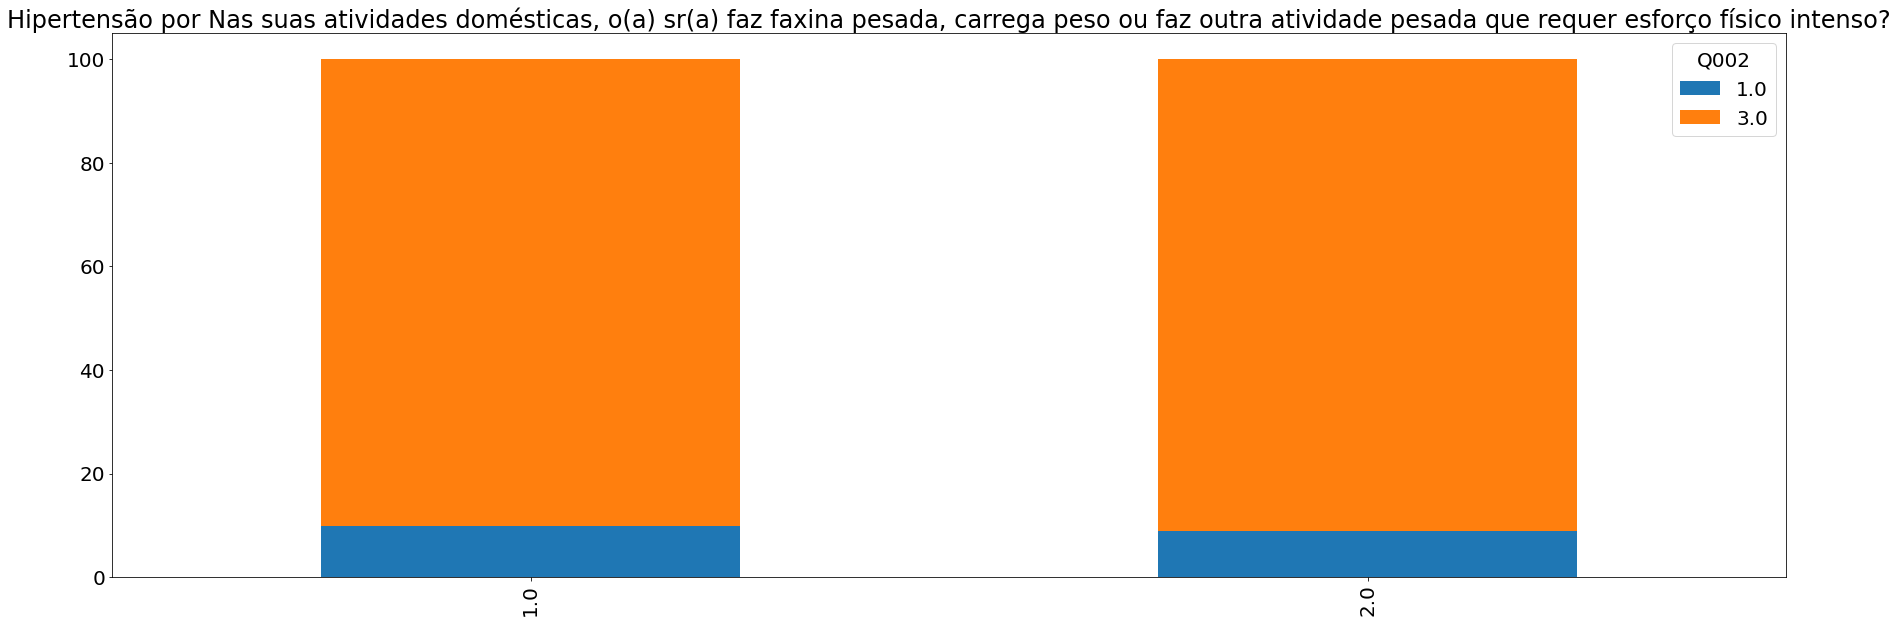

2.0    543
3.0    518
1.0    391
4.0    324
5.0    212
7.0    180
6.0    127
8.0    117
Name: P045, dtype: int64 [5. 2. 7. 4. 1. 3. 8. 6.]


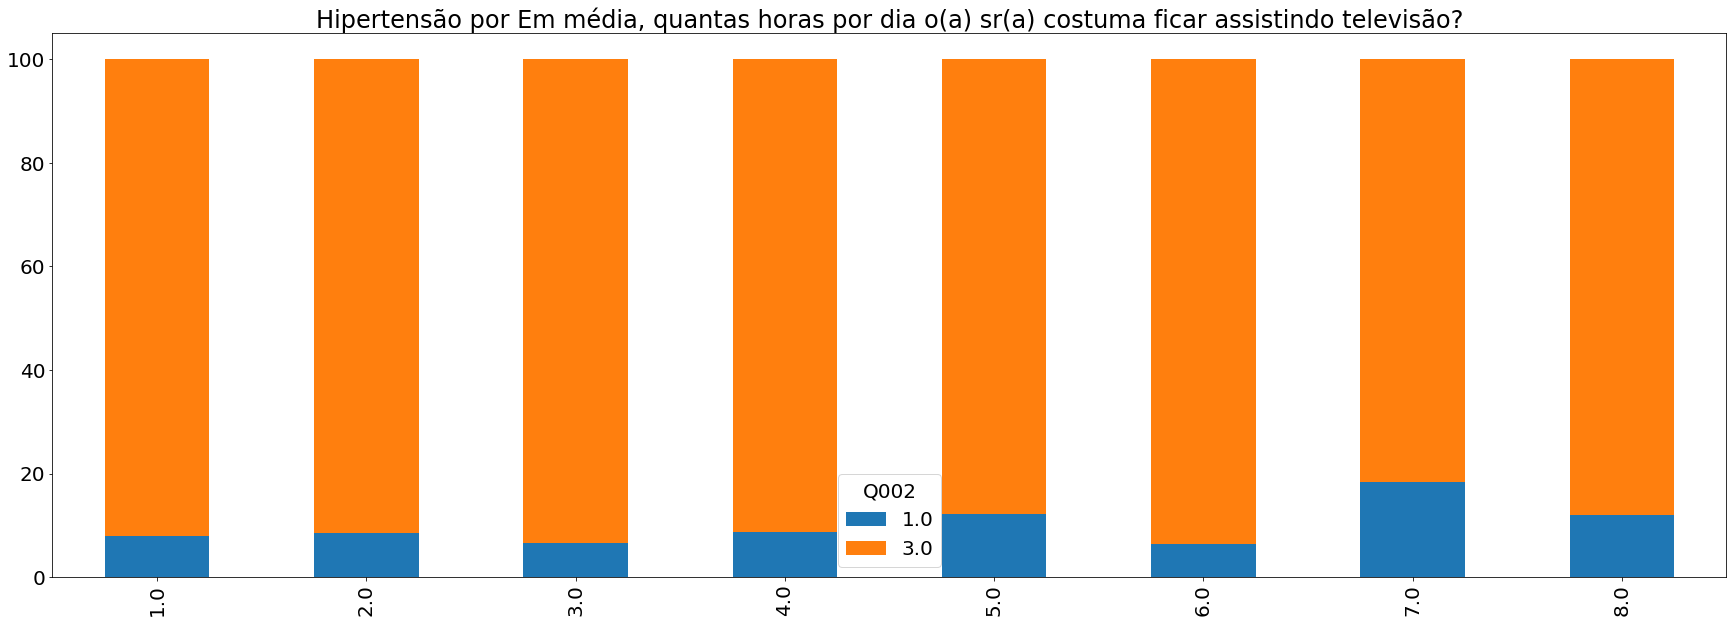

3.0    2180
1.0     156
2.0      76
Name: P050, dtype: int64 [3. 2. 1.]


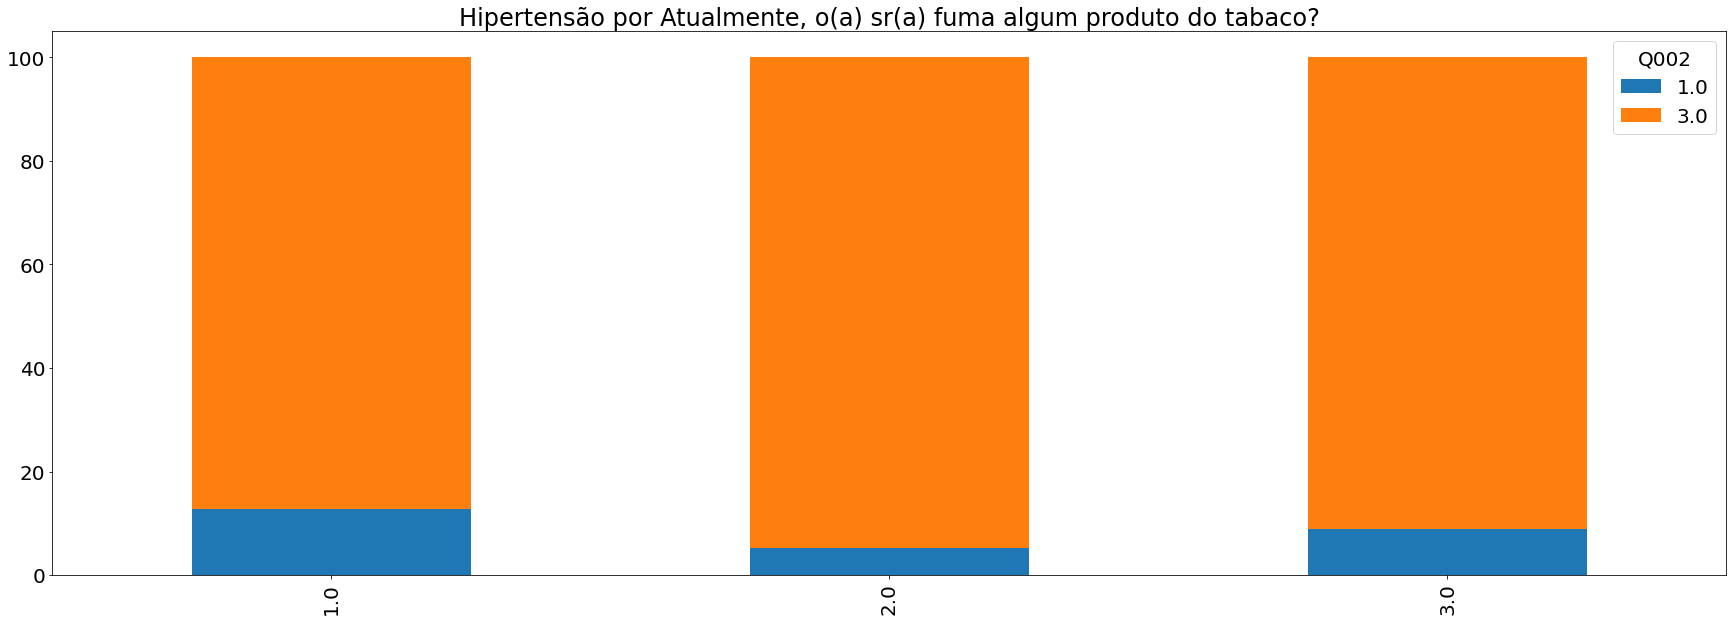

5.0    1974
1.0     328
2.0      56
4.0      37
3.0      17
Name: P068, dtype: int64 [5. 4. 1. 2. 3.]


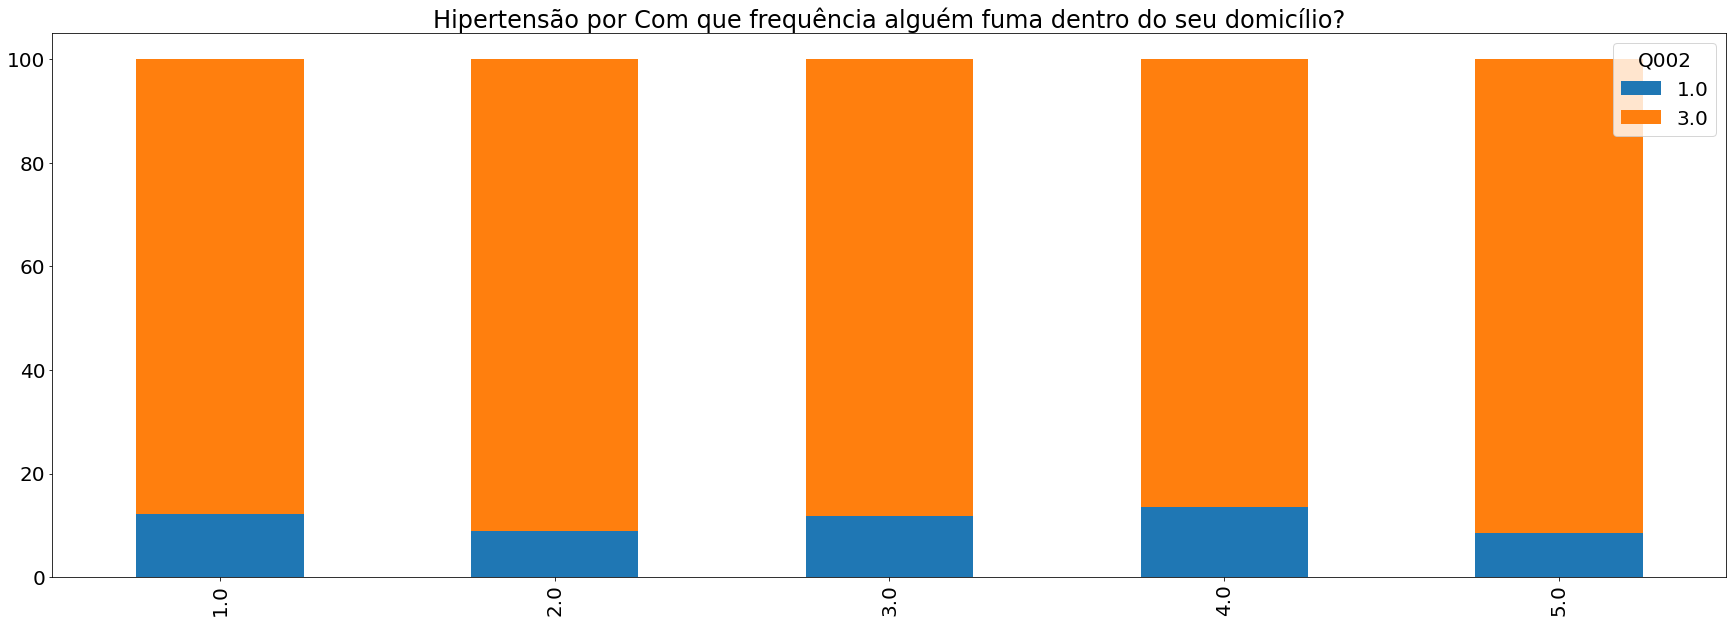

3.0    2192
1.0     220
Name: Q002, dtype: int64 [1. 3.]


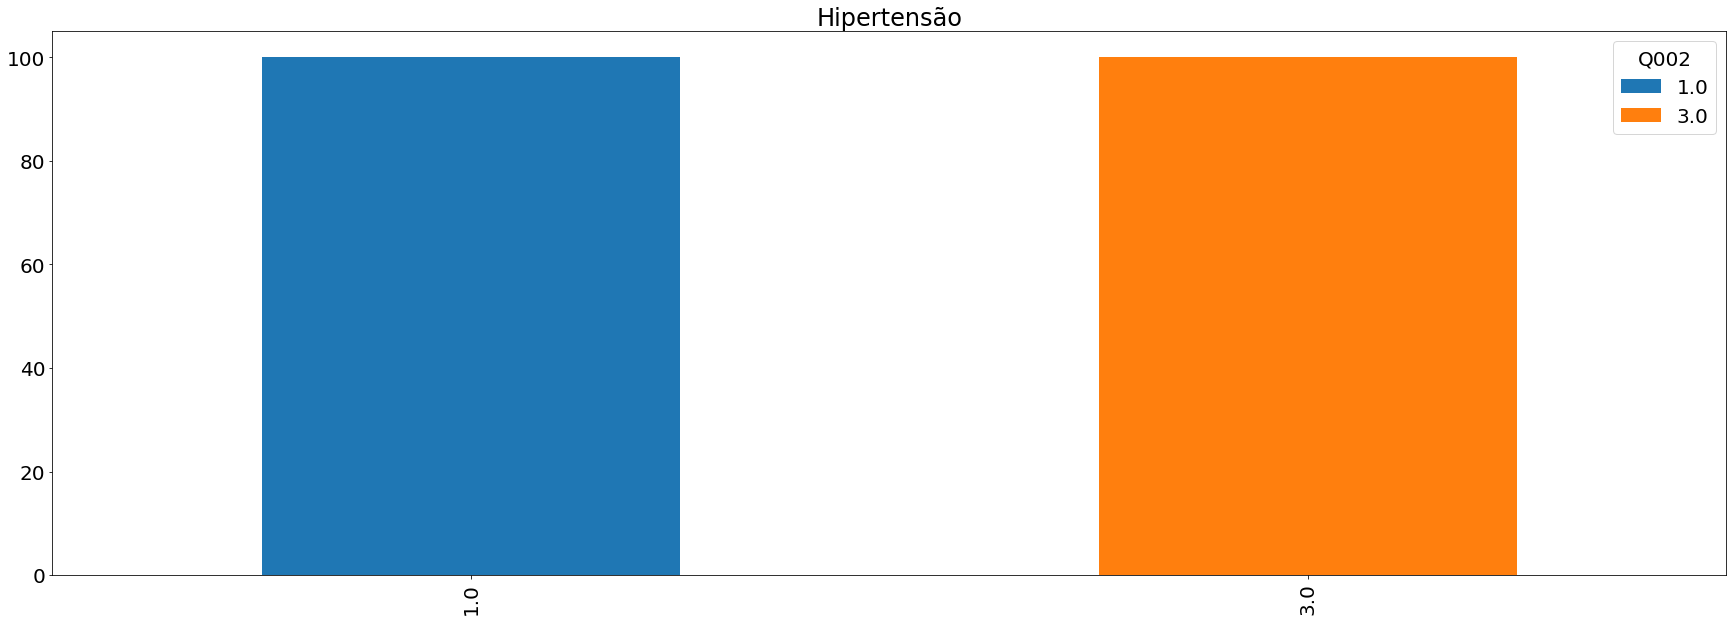

5.0    666
4.0    664
3.0    432
1.0    425
2.0    225
Name: X001, dtype: int64 [2. 3. 5. 4. 1.]


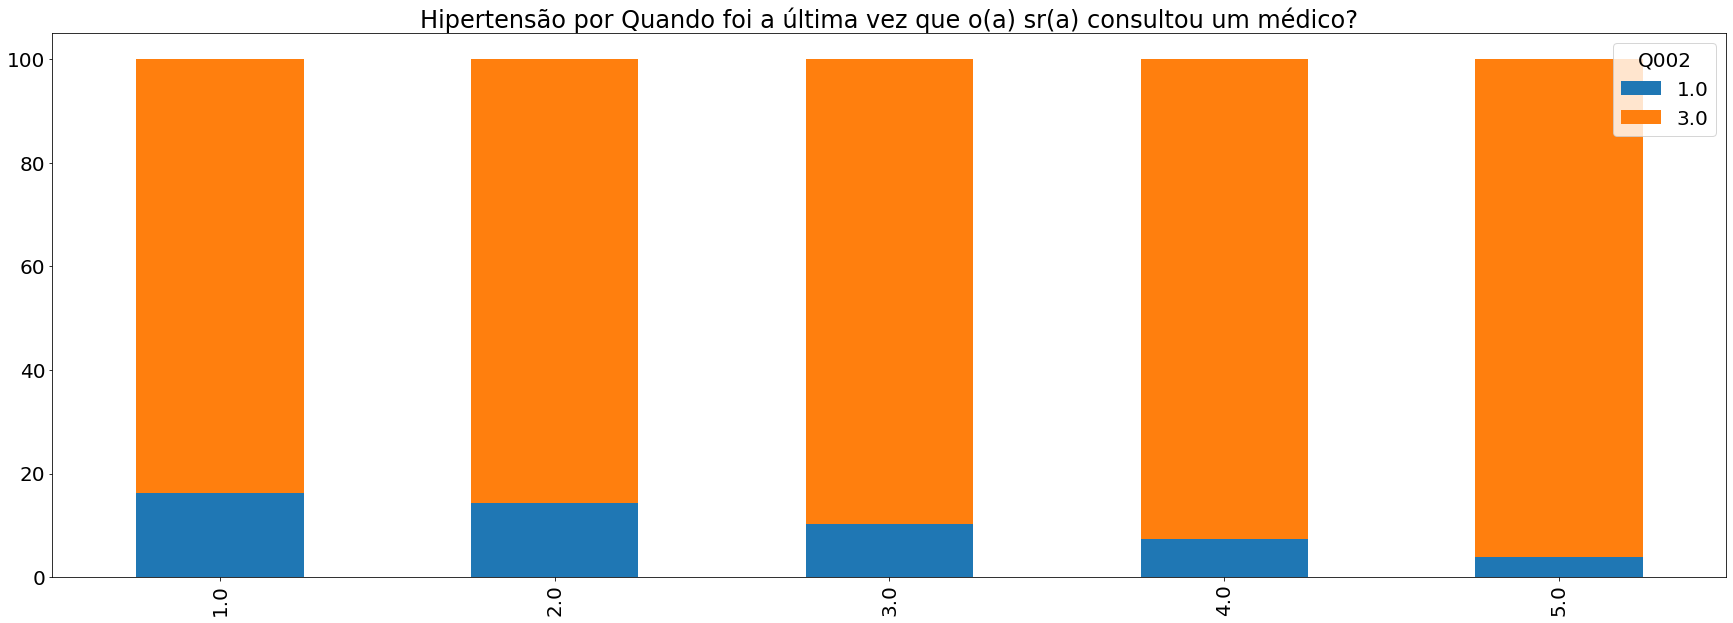

2    731
1    625
3    487
5    324
4    245
Name: regiao, dtype: int64 [1 2 3 4 5]


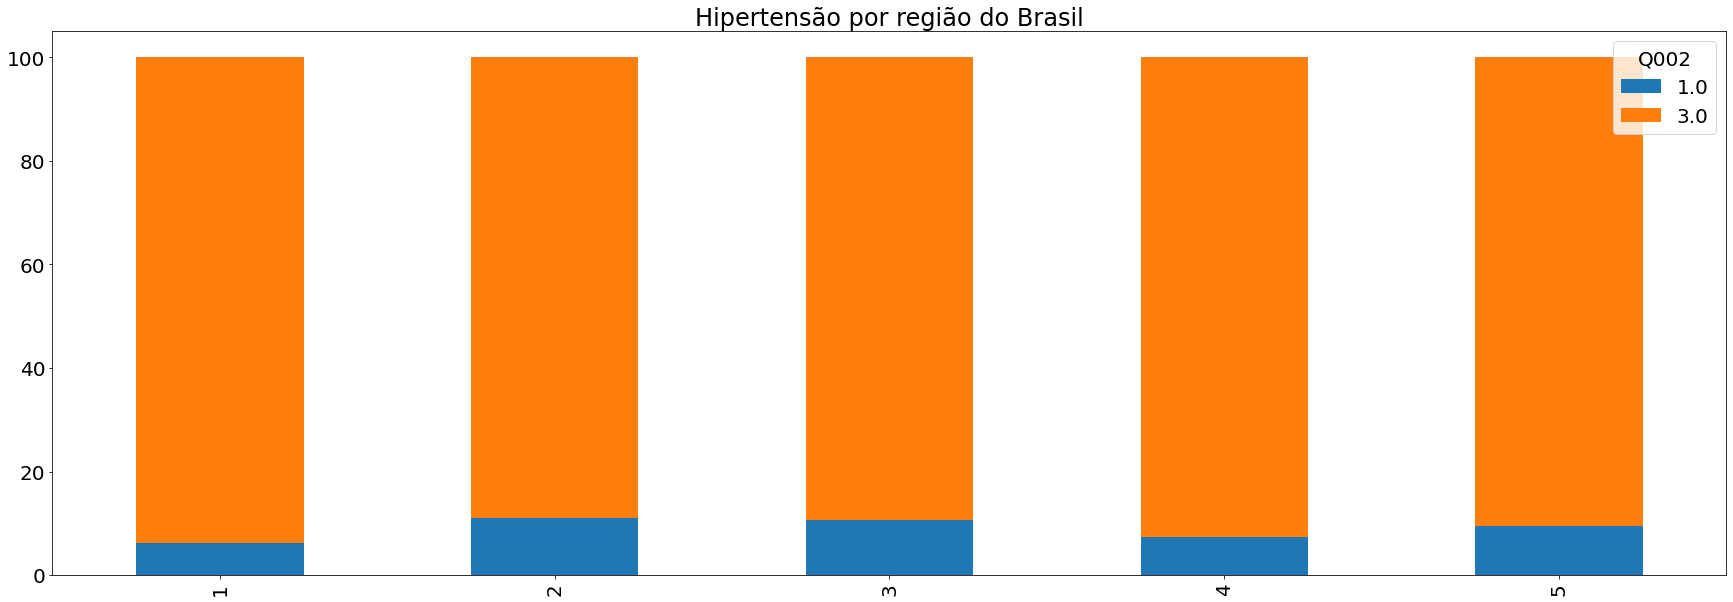

In [17]:
for item in variaveis:
    plotar_grafico(item[0], item[1])